# MTH 9875 The Volatility Surface:    Fall 2019
<p>

### Lecture 13: Rough volatility
<p>

Jim Gatheral   
Department of Mathematics     

  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "right" width=500></h3>

$$
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\ben}{\begin{enumerate}}
\newcommand{\een}{\end{enumerate}}
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\bv}{\begin{verbatim}}
\newcommand{\ev}{\end{verbatim}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\mP}{\mathbb{P}}
\newcommand{\mQ}{\mathbb{Q}}
\newcommand{\sigl}{\sigma_L}
\newcommand{\BS}{\rm BS}
\newcommand{\vix}{\text{VIX}}
\newcommand{\p}{\partial}
\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\mt}{\mathbf{t}}
\newcommand{\mS}{\mathbf{S}}
\newcommand{\tC}{\widetilde{C}}
\newcommand{\hC}{\widehat{C}}
\newcommand{\cE}{\mathcal{E}}
\newcommand{\tH}{\widetilde{H}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\cS}{\mathcal{S}}
\newcommand{\cR}{\mathcal{R}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cV}{\mathcal{V}}
\newcommand{\cG}{\mathcal{G}}
\newcommand{\cv}{\mathcal{v}}
\newcommand{\cg}{\mathcal{g}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\dt}{\Delta t}
\newcommand{\tr}{{\rm tr}}
\newcommand{\sgn}{\mathrm{sign}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$

### Outline of Lecture 13

* The time series of historical volatility
    - Scaling properties


* The RFSV model


* Forecasting realized variance


* The Rough Bergomi model



* Forecasting the forward variance curve


* The time series of variance swaps


* Relating historical and implied



### Motivation for econometric study

- <span>[Alòs et al.]<sup id="cite_ref-Alos" class="reference"><a href="#cite_note-Alos">[1]</a></sup>  and subsequently <span>[Fukasawa]<sup id="cite_ref-Fukasawa" class="reference"><a href="#cite_note-Fukasawa">[9]</a></sup> showed that the empirically observed power-law term structure of the at-the-money volatility skew could be replicated in the short expiration limit by a stochastic volatility model where the volatility process is a function of fractional Brownian motion (fBm). 


- For such a model to offer a realistic description of the historical time series of instantaneous volatility, this time series would have to exhibit scaling properties consistent with fBm. 


- It is therefore natural to investigate the scaling properties of volatility time series.  


### The time series of realized variance

- We would like to study the time series of instantaneous variance $v_t$ but of course cannot because $v_t$ is latent.


- On the other hand, integrated variance $\frac 1 \delta \,\int_t^{t+\delta}\,v_s\,ds$ may (in principle) be estimated arbitrarily accurately given enough price data.

    - In practice, market microstructure noise makes estimation harder at very high frequency.
    - Sophisticated estimators of integrated variance have been developed to adjust for market microstructure noise.  See Gatheral and Oomen<sup id="cite_ref-GO" class="reference"><a href="#cite_note-GO"><span>[</span>11<span>]</span></a></sup> (for example) for details of these.

- The Oxford-Man Institute of Quantitative Finance makes historical realized variance (RV) estimates freely available at http://realized.oxford-man.ox.ac.uk.  These estimates are updated daily.

    - Each day, for 31 different indices, all trades and quotes are used to estimate realized (or integrated) variance over the trading day from open to close.



- Using daily RV estimates as proxies for instantaneous variance, we may investigate the time series properties of integrated variance empirically.

First update and save the latest Oxford-Man data:

In [1]:
download.file(url="https://realized.oxford-man.ox.ac.uk/images/oxfordmanrealizedvolatilityindices.zip", destfile="oxfordRvData.zip")
unzip(zipfile="oxfordRvData.zip")

There are many different estimates of realized variance, all of them very similar.  We will use the realized kernel estimates denoted by ".rk".

In [2]:
library(quantmod)
library(repr)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [3]:
rv.data <- read.csv("OxfordManRealizedVolatilityIndices.csv")

rv1 <- data.frame(rv.data$X,rv.data$Symbol,rv.data$rk_th2) # Tukey-Hanning kernel
names(rv1) <- c("Date","Symbol","rk")
index.names <- as.matrix(unique(rv1$Symbol))

In [4]:
rv.list <- NULL
index.names <- as.matrix(index.names)

In [5]:
n <- length(index.names)

for (i in 1:n){
    pick <- (rv1$Symbol==index.names[i])
    tmp <- rv1[pick,]
    dates <- strptime(tmp$Date,"%Y-%m-%d")
    tmp.krv1 <- xts(tmp$rk,order.by=dates) 
    rv.list[[i]] <- tmp.krv1[(tmp.krv1!="")&(tmp.krv1!="0")]
}

In [6]:
names(rv.list) <- index.names
names(rv.list)

[1] ".AEX"      ".AORD"     ".BFX"      ".BSESN"    ".BVLG"     ".BVSP"    
 [7] ".DJI"      ".FCHI"     ".FTMIB"    ".FTSE"     ".GDAXI"    ".GSPTSE"  
[13] ".HSI"      ".IBEX"     ".IXIC"     ".KS11"     ".KSE"      ".MXX"     
[19] ".N225"     ".NSEI"     ".OMXC20"   ".OMXHPI"   ".OMXSPI"   ".OSEAX"   
[25] ".RUT"      ".SMSI"     ".SPX"      ".SSEC"     ".SSMI"     ".STI"     
[31] ".STOXX50E"

Let's plot SPX realized variance.

In [7]:
library(repr)
options(repr.plot.width=14,repr.plot.height=8)

In [8]:
spx.rk <- rv.list[[".SPX"]]
stoxx.rk <- rv.list[[".STOXX50E"]]
ftse.rk <- rv.list[[".FTSE"]]

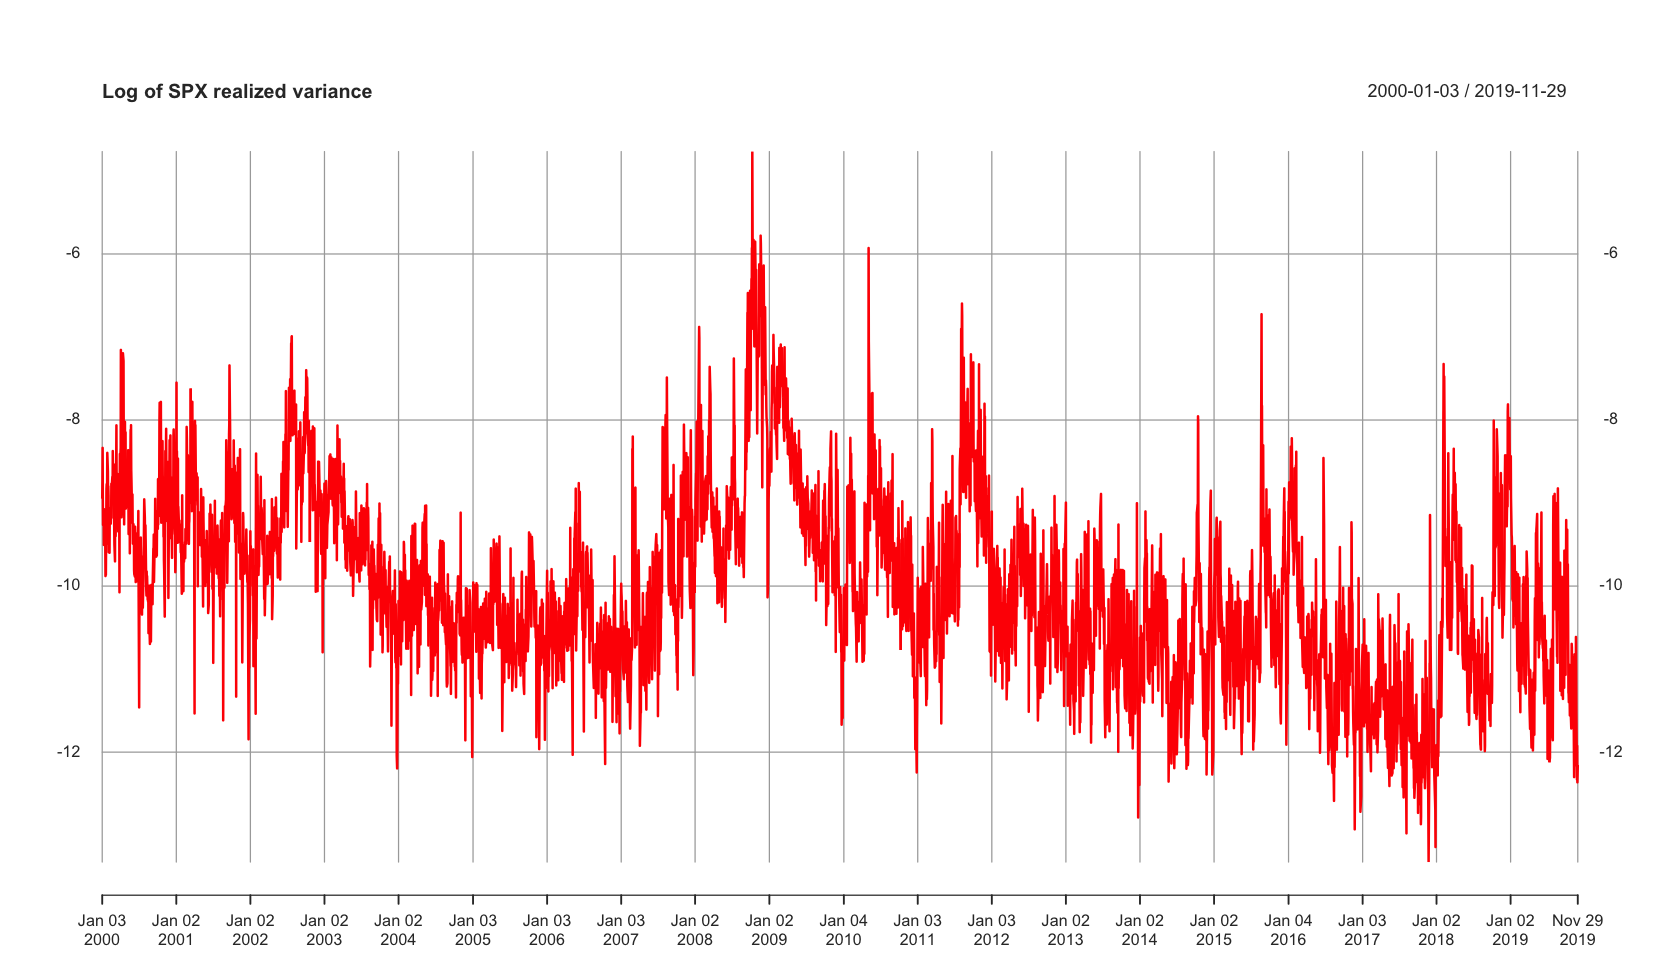

In [9]:
plot(log(spx.rk), main="Log of SPX realized variance",col="red")

Figure 1: Oxford-Man Log KRV estimates of SPX realized variance from January 2000 to the current date.

In [10]:
print(head(spx.rk))
print(tail(spx.rk))

                   [,1]
2000-01-03 1.301572e-04
2000-01-04 1.622259e-04
2000-01-05 2.398365e-04
2000-01-06 1.322324e-04
2000-01-07 9.486773e-05
2000-01-10 1.121113e-04
                   [,1]
2019-11-21 1.646155e-05
2019-11-22 9.741786e-06
2019-11-25 4.418525e-06
2019-11-26 6.624139e-06
2019-11-27 4.271678e-06
2019-11-29 5.261494e-06


### Scaling of the volatility process


For $q\geq 0$, we define the $q$th sample moment of differences of log-volatility at a given lag $\Delta$.($\angl{\cdot}$ denotes the sample average):

$$
m(q,\Delta)=\angl{\left|\log \sigma_{t+\Delta} -\log \sigma_{t} \right|^q}
$$

For example

$$
m(2,\Delta)=\angl{\left(\log \sigma_{t+\Delta} -\log \sigma_{t} \right)^2}
$$

is just the sample variance of differences in log-volatility at the lag $\Delta$.




### Scaling of $m(q,\Delta)$ with lag $\Delta$

In [11]:
sig <- sqrt(as.numeric(spx.rk))

mq.del.Raw <- function(q,lag){mean(abs(diff(log(sig),lag=lag))^q)}
mq.del <- function(x,q){sapply(x,function(x){mq.del.Raw(q,x)})}

# Plot mq.del(1:100,q) for various q

x <- 1:100

mycol <- rainbow(5)

ylab <- expression(paste(log," ",m(q,Delta)))
xlab <- expression(paste(log, " ", Delta))

qVec <- c(.5,1,1.5,2,3)
zeta.q <- numeric(5)
q <- qVec[1]

In [12]:
options(repr.plot.height=7, repr.plot.width=10)

[1] 0.08159805 0.16043242 0.23608955 0.30818004 0.44036084


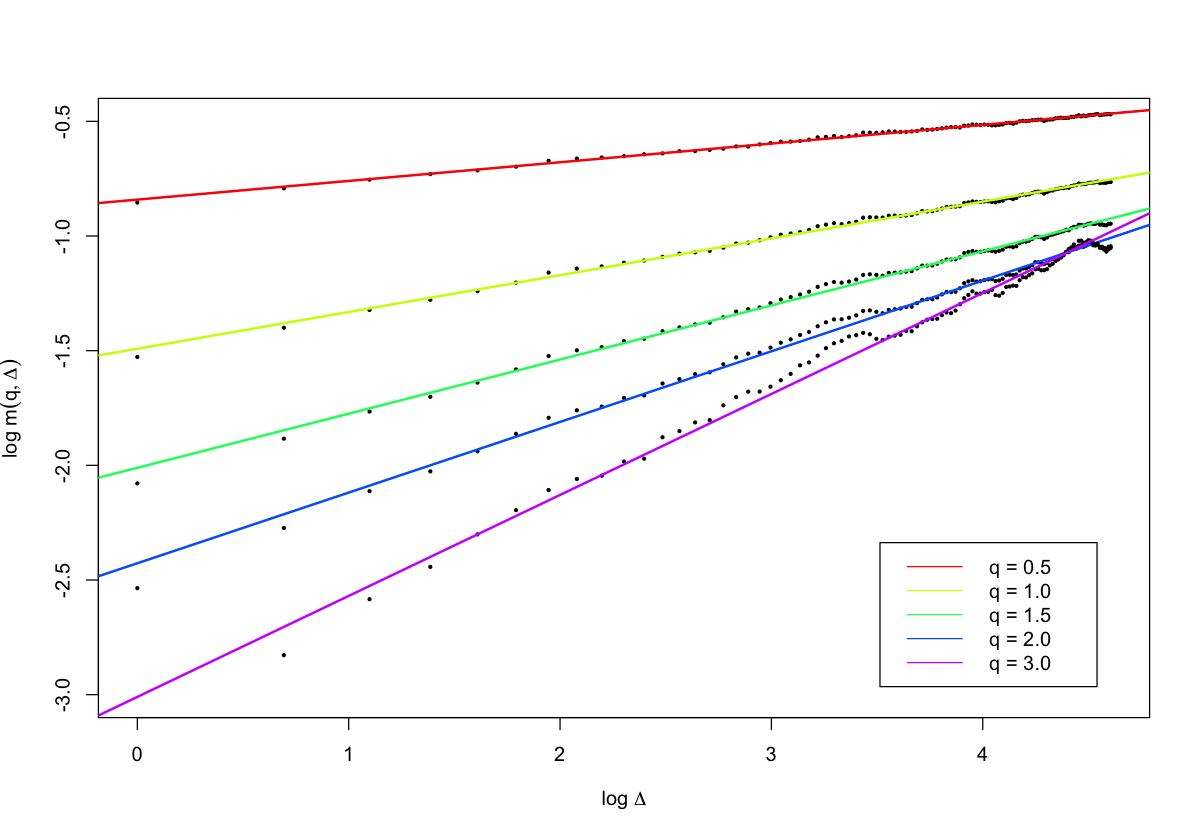

In [13]:
plot(log(x),log(mq.del(x,q)),pch=20,cex=.5,
         ylab=ylab, xlab=xlab,ylim=c(-3,-.5))
fit.lm <- lm(log(mq.del(x,q)) ~ log(x))
abline(fit.lm, col=mycol[1],lwd=2)
zeta.q[1] <- coef(fit.lm)[2]

for (i in 2:5){
    q <- qVec[i]
    points(log(x),log(mq.del(x,q)),pch=20,cex=.5)
    fit.lm <- lm(log(mq.del(x,q)) ~ log(x))
    abline(fit.lm, col=mycol[i],lwd=2)
    zeta.q[i] <- coef(fit.lm)[2]
    }
 legend("bottomright", c("q = 0.5","q = 1.0","q = 1.5","q = 2.0","q = 3.0"),inset=0.05, lty=1, col = mycol)

print(zeta.q)

Figure 2: $\log m(q,\Delta)$ as a function of $\log \Delta$, SPX.

### Monofractal scaling result

- From the above log-log plot, we see that for each $q$, $m(q,\Delta) \propto \Delta ^{\zeta_q}$.


- How does $\zeta_q$ scale with $q$?

### Scaling of $\zeta_q$ with $q$

qVec[1:4] 
0.1562301

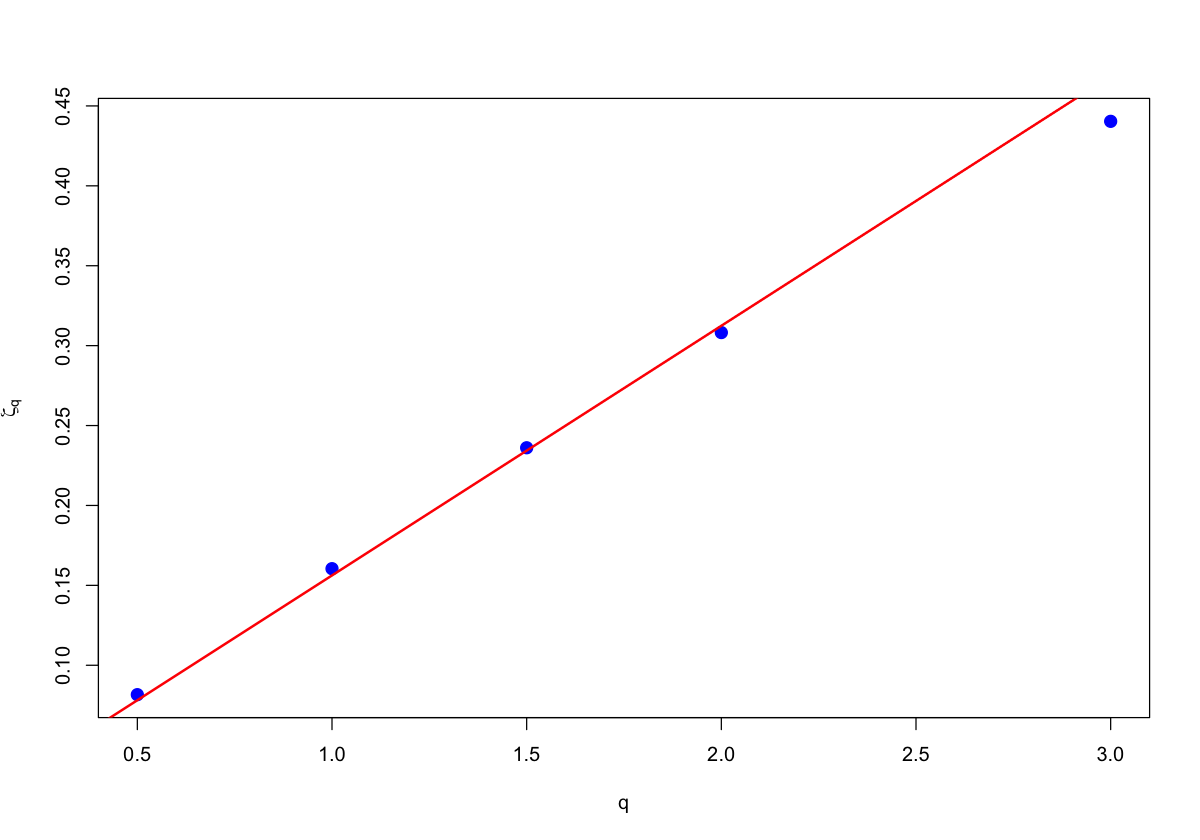

In [14]:
plot(qVec,zeta.q,xlab="q",ylab=expression(zeta[q]),pch=20,col="blue",cex=2)
fit.lm <- lm(zeta.q[1:4] ~ qVec[1:4]+0)
abline(fit.lm, col="red",lwd=2)
(h.est <- coef(fit.lm)[1])

Figure 3: Scaling of $\zeta_q$ with $q$.

We find the monofractal scaling relationship

$$
\zeta_q = q\,H
$$

with $H \approx 0.15$.

- Note however that $H$ does vary over time, in a narrow range, as we will see later.


- Note also that our estimate of $H$ is biased high because we proxied instantaneous variance $v_t$ with its average over each day $\frac 1T\,\int_0^T\,v_t\,dt$, where $T$ is one trading day.
    - On the other hand, the time series of realized variance is noisy and this causes our estimate of $H$ to be biased low.
    
    

- This scaling property as $\Delta \to 0$ is equivalent to $H$-Hölder continuity of paths of the volatility.
    - Since $H \ll 1/2$, *volatility is rough*!

### Estimated $H$ for all indices

We now repeat this analysis for all 31 indices in the Oxford-Man dataset.

In [15]:
n <- length(rv.list)
h <- numeric(n) # H is estimated as half of the slope
nu <- numeric(n)

for (i in 1:n){ # Run all the regressions
  v <- rv.list[[i]]
  sig <- sqrt(abs(as.numeric(v)))
    
  x <- 1:100
  dlsig2 <- function(lag){mean((diff(log(sig),lag=lag))^2)}
  dlsig2Vec <- function(x){sapply(x,dlsig2)}

  fit.lm <- lm(log(dlsig2Vec(x)) ~ log(x))

  nu[i] <- sqrt(exp(coef(fit.lm)[1]))
  h[i] <- coef(fit.lm)[2]/2
  
}

In [16]:
(OxfordH <- data.frame(names(rv.list),h.est=h,nu.est=nu))

names.rv.list.,h.est,nu.est
.AEX,0.14634465,0.2727739
.AORD,0.09288328,0.3056644
.BFX,0.13468736,0.2537386
.BSESN,0.11946370,0.2971569
.BVLG,0.09477197,0.2492628
.BVSP,0.12426758,0.2965544
.DJI,0.15564309,0.2815537
.FCHI,0.13173989,0.2833122
.FTMIB,0.12434469,0.2679135
.FTSE,0.13348422,0.2772446


### Distributions of $(\log \sigma_{t+\Delta}-\log \sigma_t)$ for various lags $\Delta$

Having established these beautiful scaling results for the moments, how do the histograms look?

In [17]:
plotScaling <- function(j,scaleFactor){
  v <- as.numeric(rv.list[[j]])
  x <- 1:100
  
  xDel <- function(x,lag){diff(x,lag=lag)}
  sd1 <- sd(xDel(log(v),1))
  sdl <- function(lag){sd(xDel(log(v),lag))}

  h <- OxfordH$h.est[j]
  
  plotLag <- function(lag){
    y <- xDel(log(v),lag)
    hist(y,breaks=100,freq=F,main=paste("Lag =",lag,"Days"),xlab=NA)# Very long tailed!
    curve(dnorm(x,mean=mean(y),sd=sd(y)),add=T,col="red",lwd=2)
    curve(dnorm(x,mean=0,sd=sd1*lag^h),add=T,lty=2,lwd=2,col="blue")
  }
  
  (lags <- scaleFactor^(0:3))
  print(names(rv.list)[j])
  par(mfrow=c(2,2))
  par(mar=c(3,2,1,3))
  for (i in 1:4){plotLag(lags[i])}
  par(mfrow=c(1,1))
}

In [18]:
options(repr.plot.height=5, repr.plot.width=10)

[1] ".SPX"


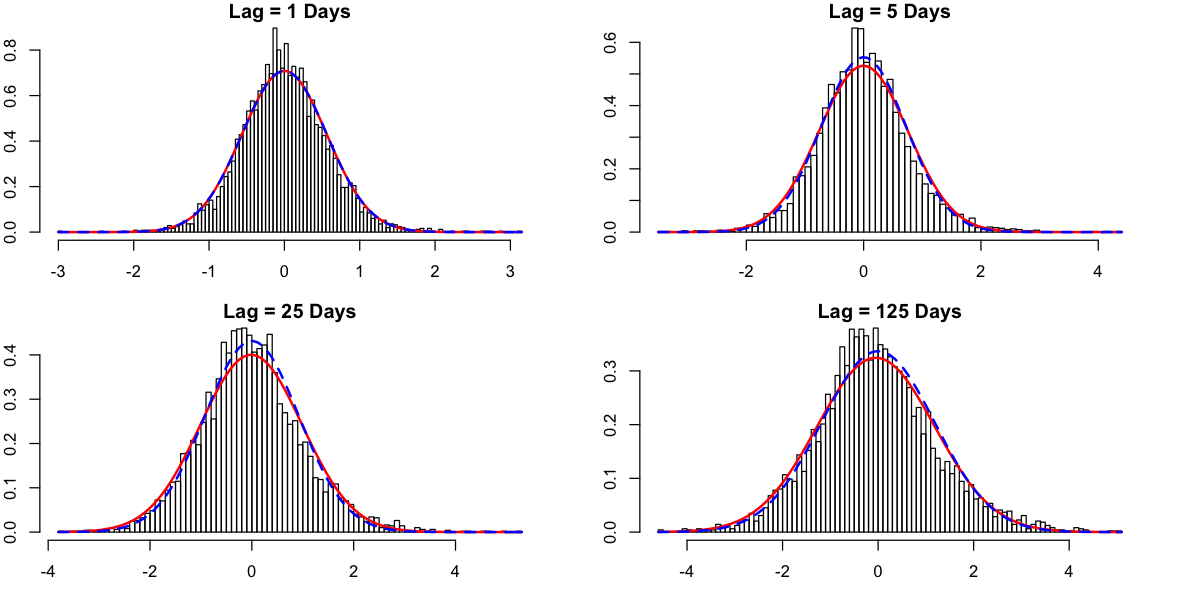

In [19]:
plotScaling(27,5)

Figure 4: Histograms of $(\log \sigma_{t+\Delta}-\log \sigma_t)$ for various lags $\Delta$; normal fit in red; $\Delta=1$ normal fit scaled by $\Delta^{H}$ in blue.


### Universality?

- <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>10<span>]</span></a></sup> compute daily realized variance estimates over one hour windows for DAX and Bund futures contracts, finding similar scaling relationships.


- We have also checked that Gold and Crude Oil futures scale similarly.

    - Although the increments $(\log \sigma_{t+\Delta}-\log \sigma_t)$ seem to be fatter tailed than Gaussian.  
    
    
- <span>[Bennedsen et al.]<sup id="cite_ref-HCE" class="reference"><a href="#cite_note-HCE"><span>[</span>6<span>]</span></a></sup>, estimate volatility time series for more than five thousand individual US equities, finding rough volatility in every case.

### A microstructural explanation: A Hawkes model of price formation

- Why might rough volatility be universal?



- <span>[Jaisson and Rosenbaum]<sup id="cite_ref-JaissonRosenbaum" class="reference"><a href="#cite_note-JaissonRosenbaum"><span>[</span>13<span>]</span></a></sup> show that rough volatility can be obtained as a scaling limit of a simple model of price dynamics in terms of Hawkes processes.


- Remarkably, <span>[El Euch and Rosenbaum]<sup id="cite_ref-ElEuchRosenbaum" class="reference"><a href="#cite_note-ElEuchRosenbaum"><span>[</span>7<span>]</span></a></sup> were able to compute the characteristic function of the resulting *rough Heston* model.


### A natural model of realized volatility

- Distributions of differences in the log of realized variance are close to Gaussian.

    - This motivates us to model $\sigma_t=\log v_t$ as a lognormal random variable.


- Moreover, the scaling property of variance of RV differences suggests the model:
<p>
<a name="eq:dataDriven"></a>(1)
$$
\log \sigma_{t+\Delta} - \log \sigma_t =\nu\,\left( W^H_{t+\Delta}-W^H_t\right)
$$
<p>
where $W^H$ is fractional Brownian motion.


- Indeed, if $H$ is constant, [(1)](#eq:dataDriven) is the *unique* model consistent with Gaussianity of log differences, the observed scaling, and continuity of the volatility process.

### Fractional Brownian motion (fBm)

- *Fractional Brownian motion* (fBm) $\{W^H_t; t \in \mathbb{R}\}$ is the unique Gaussian process with mean zero and autocovariance function
$$
\ee{ W^H_t\,W^H_s  } = \frac12\,\left\{ |t|^{2\,H}+|s|^{2\,H}-|t-s|^{2\,H}  \right\}
$$
where $H \in (0,1)$ is called the *Hurst index* or parameter.
   - In particular, when $H=1/2$, fBm is just Brownian motion.
 
   - If $H>1/2$, increments are positively correlated ("trending").
   - If $H<1/2$, increments are negatively correlated ("reverting").

 

### Representations of fBm

There are infinitely many possible representations of fBm in terms of Brownian motion.  For example, with $\gamma = \frac 12 - H$,


<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Mandelbrot-Van Ness</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>

$$
W^H_t ={C_H}\,\left\{\int_{-\infty}^t \,\frac{dW_s}{(t-s)^\gamma} - \int_{-\infty}^0 \,\frac{dW_s}{(-s)^\gamma}\right\}.
$$
<br>

</div>

</blockquote>

where the choice

$$
C_H = \sqrt{ \frac{2\,H\,\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2\,H)}}
$$

ensures that

$$
\ee{W^H_t\,W^H_s }= \frac{1}{2}\,\left\{t^{2 H} + s^{2 H} - |t-s|^{2 H}\right\}.
$$


### Efficient estimation of $H$

- So far, we just used simple regression to estimate $H$.


- When $H$ is small, as we find empirically, out of all the estimators that we tested, the ACF estimator adopted by <span>[Bennedsen et al.]<sup id="cite_ref-BLPdecoupling" class="reference"><a href="#cite_note-BLPdecoupling"><span>[4]</span></a></sup> is the most efficient. 

### Heuristic derivation of the ACF estimator


Once again, the covariance structure of fBm is given by

$$
\E\left[W^H_t\,W^H_s\right]= \frac{1}{2}\,\left\{t^{2 H} + s^{2 H} - |t-s|^{2 H}\right\}.
$$


Up to a multiplicative factor, our model is 

$$
y_t = \log v_t = W^H_t.
$$

Then
$
\var[y_t] = t^{2 H}.
$
and


$$
\cov[y_t,y_{t+\Delta}] =  \frac{1}{2}\,\left\{t^{2 H} + (t+\Delta)^{2 H} - \Delta^{2 H}\right\}
$$

Dividing one by the other gives

$$
\rho(\Delta) = \frac{1}{2}\,\left\{1 + \left(1+\frac\Delta t\right)^{2 H} - \left(\frac\Delta t\right)^{2 H}\right\}
%&=& 1- \frac{1}{2}\,\left(\frac\Delta t\right)^{2 H} + O(
$$


Thus, for $\Delta/t$ sufficiently small,


$$
1-\rho(\Delta) =\frac12 \left(\frac{\Delta}{t}\right)^{2 H} + O\left(\frac{\Delta}t\right).
$$

- Note in particular that we expect the ACF estimator to work best when $H \ll \frac{1}{2}$.  

- Also, when $H=\frac12$, we have 
$
\rho(\Delta) = 1
$
as we would expect for Brownian motion.

### The ACF estimator

Taking logs of each side, we obtain

$$
\log(1- \rho(\Delta)) = a + 2\,H\, \log \Delta.
$$

- Thus $H$ can be estimated efficiently by regression.

In [20]:
h.acf <- function(path){
    y.acf <- acf(path,plot=F)
    log.del <- log(y.acf$lag[-1])
    log.lhs <- log(1-y.acf$acf[-1])
    fit.lm <- lm(log.lhs ~ log.del)
    return(fit.lm$coef[2]/2)
        }

### An example: Estimate of $H$ for 2005

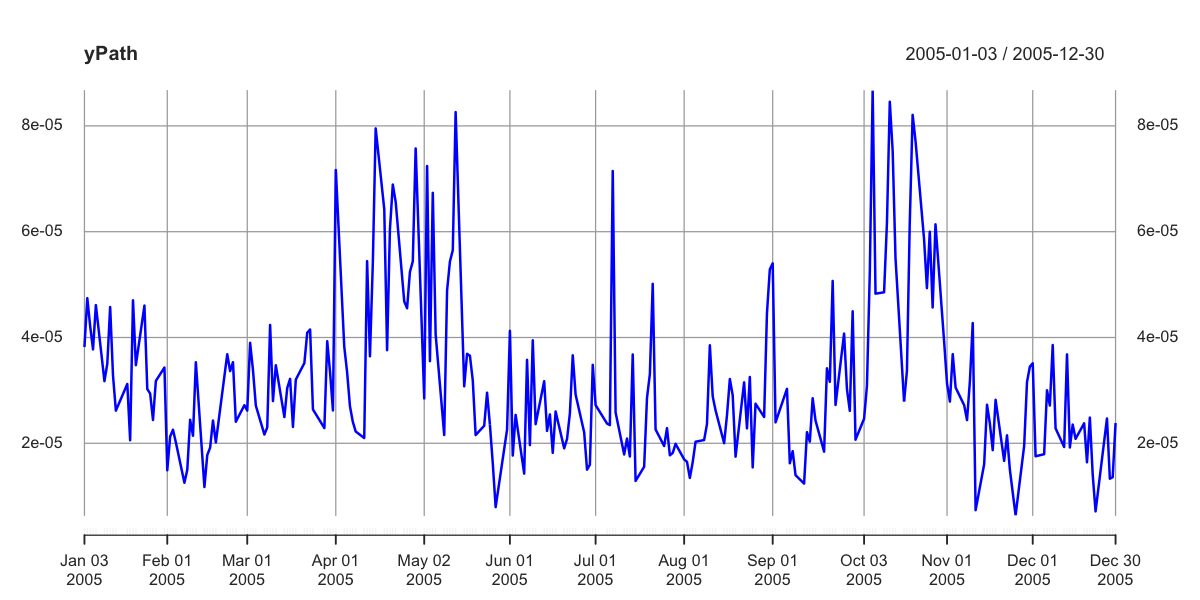

In [21]:
yPath <- spx.rk["2005-01-01::2005-12-31"]
plot(yPath,col="blue")

Figure 5: SPX realized kernel estimates of integrated variance for 2005.

In [22]:
h.acf(as.numeric(yPath))

log.del 
0.1495626

### Time series of $H$ using ACF

- We now draw the time series of $H$ using the ACF estimator.

In [23]:
h.acf.i <- function(series)function(del)function(i){
    rk.path <- as.numeric(series[(i-del):i])
    h.acf(rk.path)
    }

In [24]:
h.acf.i(spx.rk)(252)(1234)

log.del 
0.1453646

### An example: Estimate of $H$ for 2019

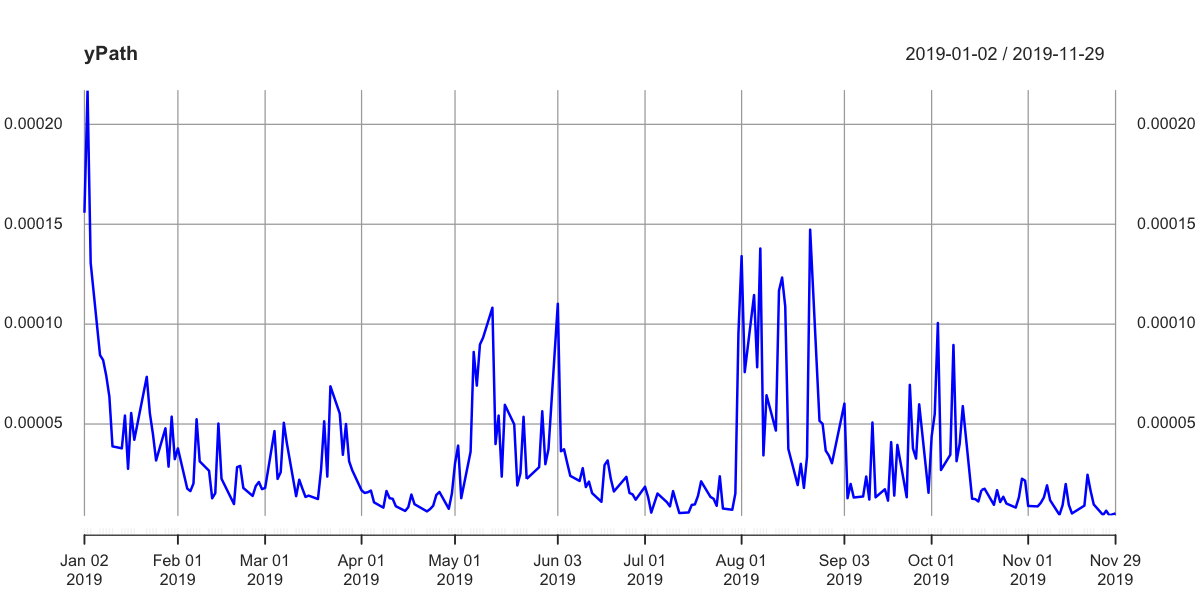

In [25]:
yPath <- spx.rk["2019-01-01::2019-11-30"]
plot(yPath,col="blue")

Figure 6: SPX realized kernel estimates of integrated variance for 2019.

In [26]:
h.acf(as.numeric(yPath))

log.del 
0.1683007

In [27]:
h.acf.series <- function(series)function(del){
    require(xts)
    n <- length(series)
    res <- sapply((1+del):n,h.acf.i(series)(del))
    return(xts(res,order.by=index(series[(1+del):length(series)]),tzone = Sys.getenv("TZ")))
}
    

### Compare the two estimates of $H$



In [28]:
rownum <- which(OxfordH[,1]==".SPX")
n.spx <- length(spx.rk)
h.spx.acf <- as.numeric(h.acf.series(spx.rk)(n.spx-1))
h.spx.regression <- OxfordH$h.est[rownum]
nu.spx.regression <- OxfordH$nu.est[rownum]
data.frame(h.spx.acf,h.spx.regression)

h.spx.acf,h.spx.regression
0.1034367,0.15409


- Looking again at the log-log plots of $m_q(\Delta)$ against $\Delta$, we note that the points don't quite lie on a straight line.


- A more careful analysis that takes account of the bias due to averaging and the noisiness of the time series of realized variance gives us an estimate of $H$ more consistent with the ACF estimate.

### Time series of $H$ for SPX

- Here $\alpha=H-\frac 12$.  Estimates use 15-minute data.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/11/alpha_inTime.png" align = "left" width=1000></h3> 




Figure 7:  Time series of H from <span>[Bennedsen et al.]<sup id="cite_ref-BLPdecoupling" class="reference"><a href="#cite_note-BLPdecoupling"><span>[</span>4<span>]</span></a></sup>.

### Observations

- $H$ tends to spike when the market is under stress.
    - And seems close to zero when the market is calm.
    - Could $H$ be related to underlying market liquidity?


- Note the following peaks
    - The Greek debt crisis in late 2011.
    - The Brexit vote in 2015.  In this case $H$ rises with uncertainty then collapses.
 
 
 
- When the market crashes, $H$ rises.
    But often $H$ rises without the market crashing.
 
 
- In particular, $H$ of the volatility time series seems to be a meaningful and relevant statistic.
    



### Repeat using the ACF estimator on daily realized kernel estimates

In [29]:
h.spx.252 <-  h.acf.series(spx.rk)(252)
h.spx.61 <-  h.acf.series(spx.rk)(61)

In [30]:
data.frame(median(h.spx.61),mean(h.spx.61))

median.h.spx.61.,mean.h.spx.61.
0.1090839,0.1174552


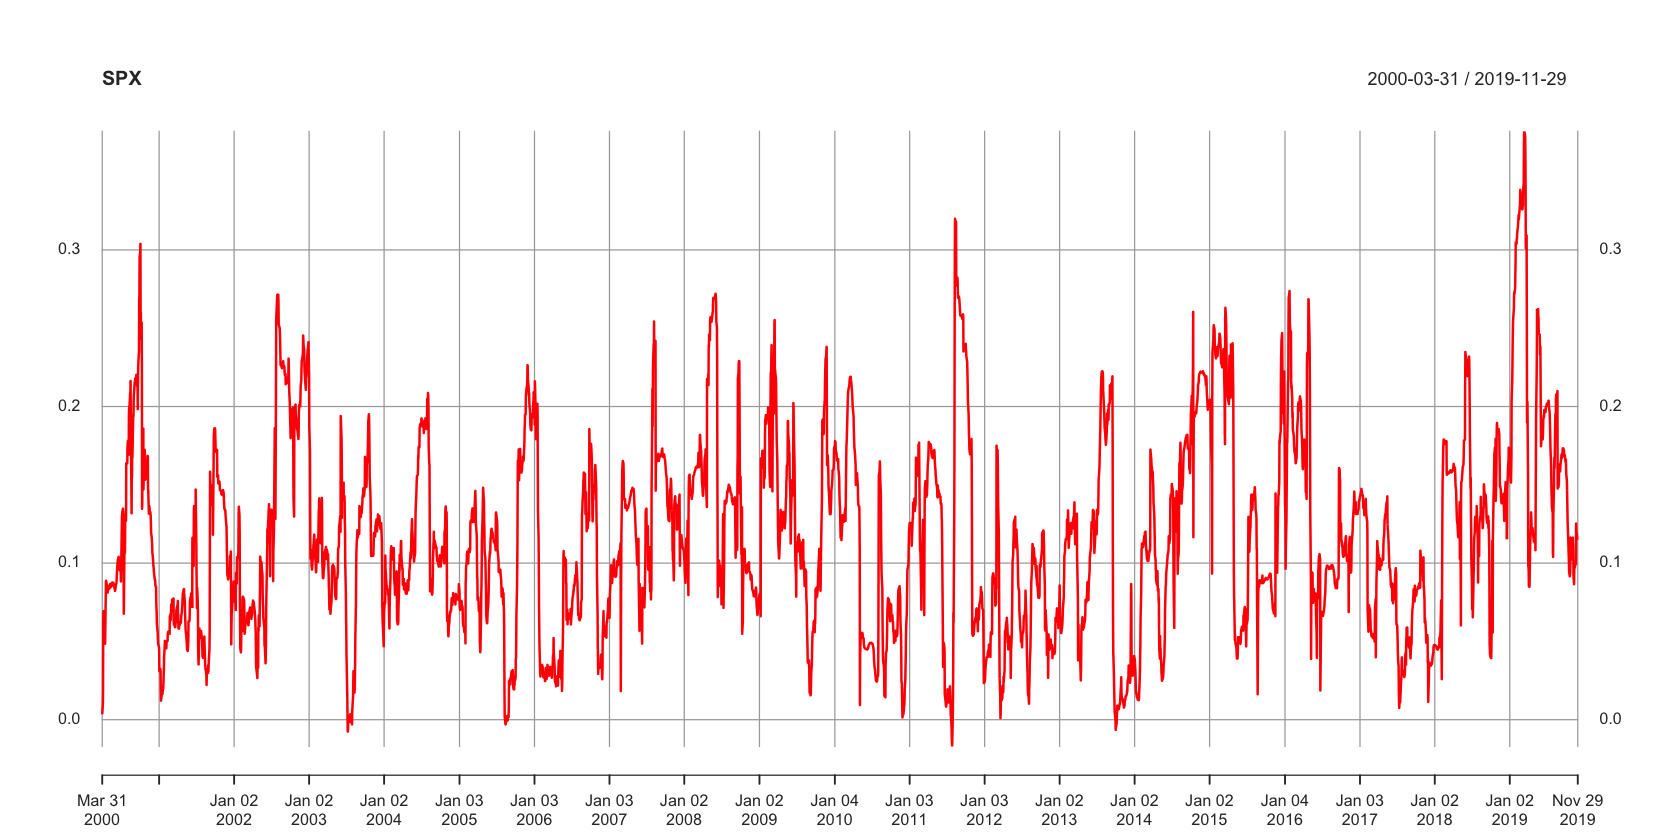

In [31]:
options(repr.plot.width=14,repr.plot.height=7)
plot(h.spx.61,main="SPX",ylab="H",col="red")

Figure 8: Time series of $H$ using data realized kernel estimates.

### Time series of $H$ for STOXX50

In [32]:
h.stoxx.61 <- h.acf.series(stoxx.rk)(61)

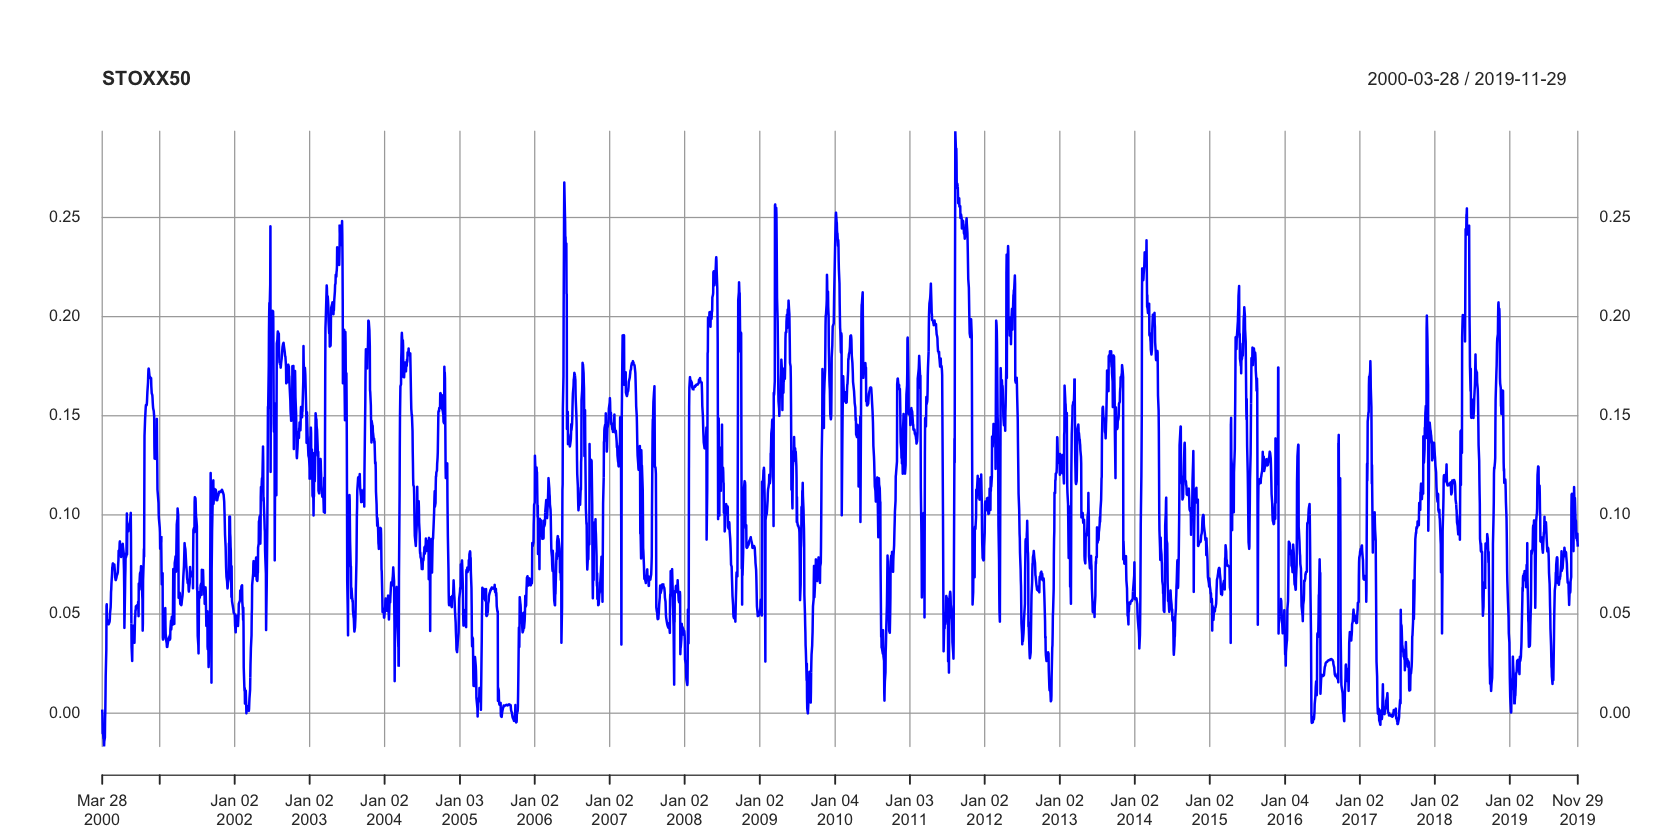

In [33]:
plot(h.stoxx.61,main="STOXX50",ylab="H",col="blue")

Figure 9: Time series of $H$ for STOXX50 using data realized kernel estimates.

### Plot both together 

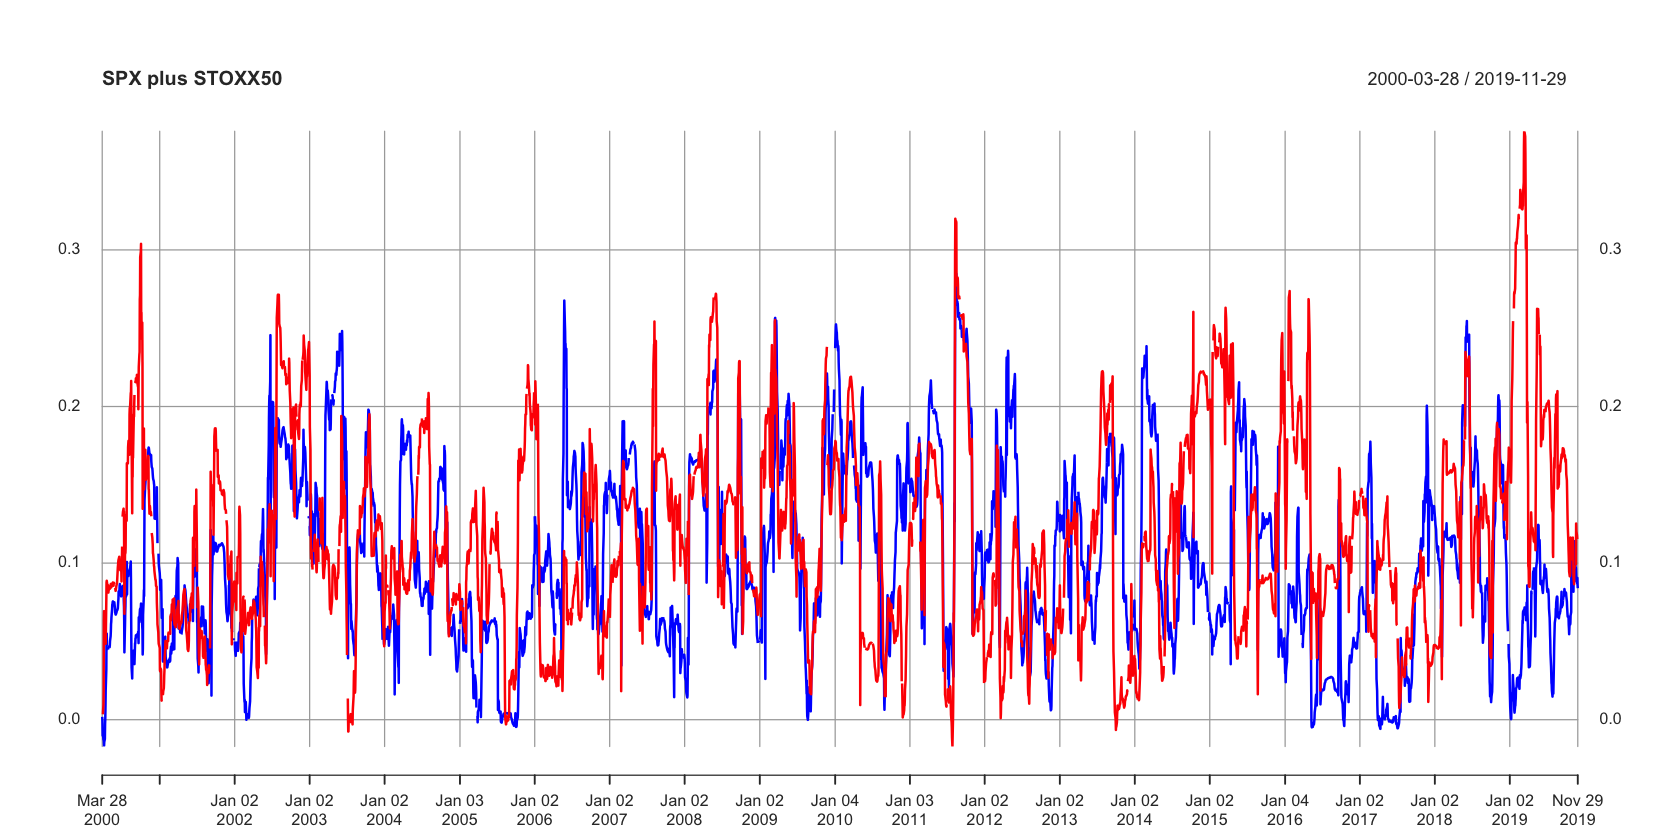

In [34]:
plot(cbind(h.spx.61,h.stoxx.61),main="SPX plus STOXX50",col=c("red","blue"),lwd=2,major.ticks= "years",
        minor.ticks = FALSE)
legend((x="topleft"), legend = c("SPY", "STOXX50"),lty = 1,lwd=2,col = c("red","blue"))

Figure 10: Sometimes the peaks line up, and sometimes not.

### Line up time series of $H$ with VIX

- First we use `quantmod` to download VIX data.

In [35]:
options("getSymbols.warning4.0"=FALSE,"getSymbols.yahoo.warning"=FALSE)
getSymbols('^VIX',from="2001-01-01")

[1] "VIX"

### Superimpose VIX and H time series

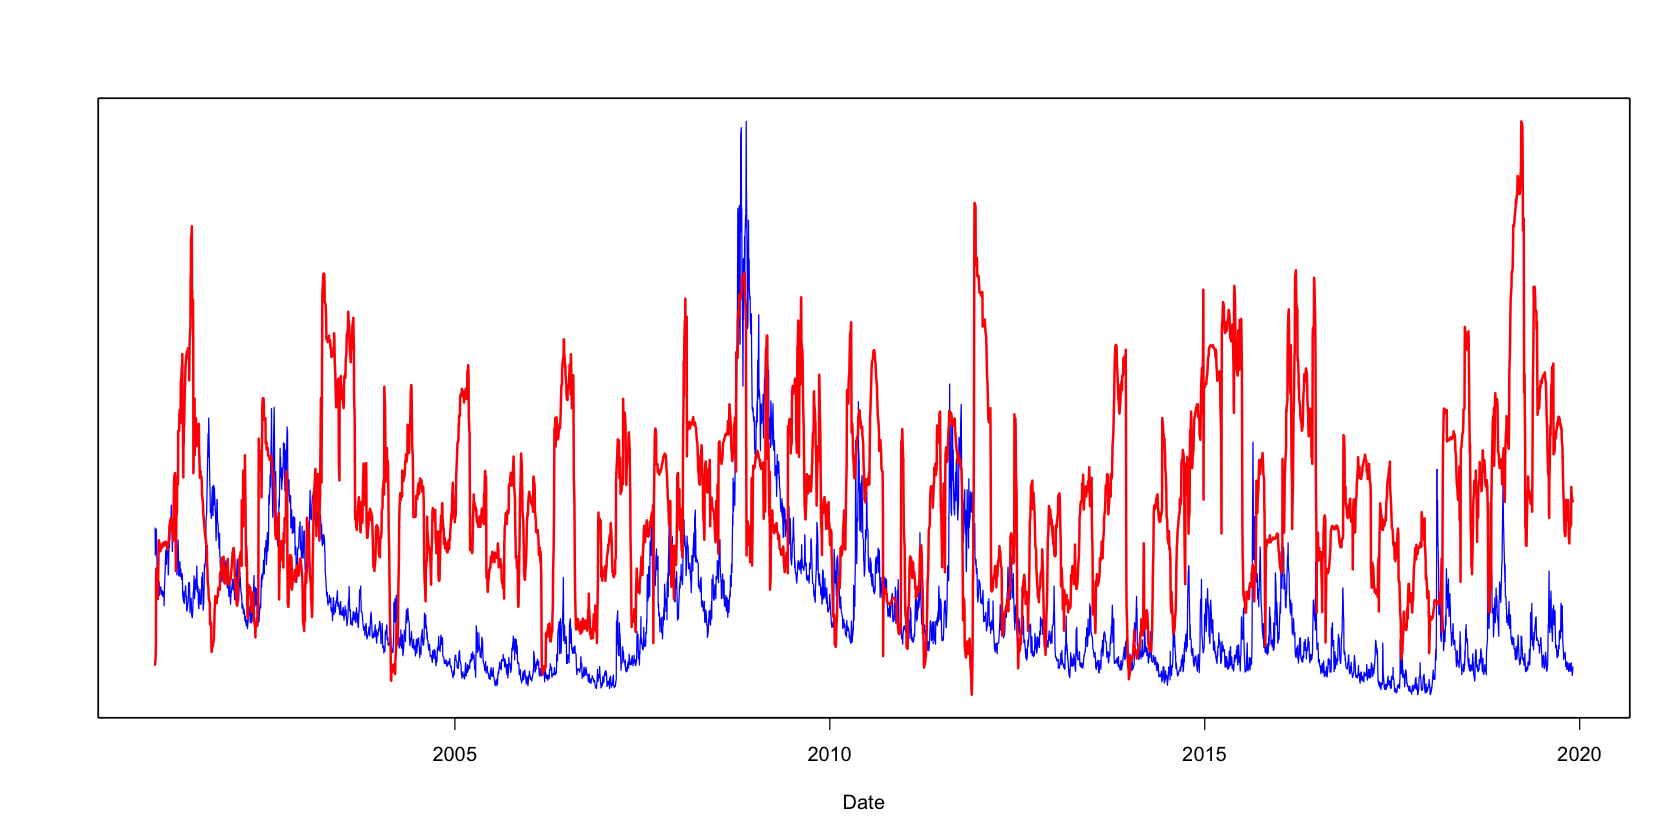

In [36]:
plot(as.zoo(Cl(VIX)),col="blue",yaxt="n",ylab="",xlab="Date")
par(new=TRUE)               
plot(as.zoo(h.spx.61),col="red", xaxt="n", yaxt="n",  xlab="", ylab="",lwd=2)

Figure 11: VIX in blue; H in red.  Sometimes $H$ increases with VIX and sometimes not.

### Comte and Renault: FSV model

<span>[Comte and Renault]<sup id="cite_ref-ComteRenault" class="reference"><a href="#cite_note-ComteRenault"><span>[</span>7<span>]</span></a></sup> were perhaps the first to model volatility using fractional Brownian motion.  

In their fractional stochastic volatility (FSV) model,

\begin{eqnarray}
\frac{dS_t}{S_t} &=& \sigma_t\,dZ_t\nonumber\\
d\log \sigma_t &=& -\alpha\,(\log \sigma_t - \theta)\,dt+ \gamma\,d\hat W^H_t
%\label{eq:FSV}
\end{eqnarray}

with

$$
\hat W^H_t = \int_0^t\,\frac{(t-s)^{H-1/2}}{\Gamma(H+1/2)}\,dW_s,\quad 1/2 \leq H < 1
$$

and $\ee{dW_t\,dZ_t}=\rho\,dt$.

### RFSV and FSV

 
  - The model [(1)](#eq:dataDriven):
$$
\log \sigma_{t+\Delta} - \log \sigma_t =\nu\,\left( W^H_{t+\Delta}-W^H_t\right)
$$
is not stationary.
     - Stationarity is desirable both for mathematical tractability and also to ensure reasonableness of the model at very large times. 
  
  
- The RFSV model (the stationary version of [(1)](#eq:dataDriven)) is formally identical to the FSV model.  Except that
 
  - $H<1/2$ in RFSV vs $H>1/2$ in FSV.
  - $\alpha\,T \gg1$  in RFSV vs $\alpha\,T \sim 1$ in FSV,
  where $T$ is a typical timescale of interest.


  

### FSV and long memory

 
- Why did <span>[Comte and Renault]<sup id="cite_ref-ComteRenault" class="reference"><a href="#cite_note-ComteRenault"><span>[</span>6<span>]</span></a></sup> choose $H>1/2$?
 
  - Because it has been a widely-accepted stylized fact that the volatility time series exhibits long memory.  


- In this technical sense, *long memory* means that the autocorrelation function of volatility decays as a power-law.


- One of the influential papers that established this was  <span>[Andersen, Bollerslev, Diebold and Ebens]<sup id="cite_ref-ABDE" class="reference"><a href="#cite_note-ABDE"><span>[2]</span></a></sup> which estimated the degree $d$ of fractional integration from daily realized variance data for the 30 DJIA stocks.  They effectively tried to fit something like FIGARCH.
 
  - Using the GPH (Geweke-Porter-Hudak) estimator, they found $d$ around $0.35$ which implies that the ACF $\rho(\tau)  \sim \tau^{2\,d-1} = \tau ^{-0.3}$ as $\tau \to \infty$.
 
 

### Log-log plot of empirical autocorrelation of volatility (correlogram)

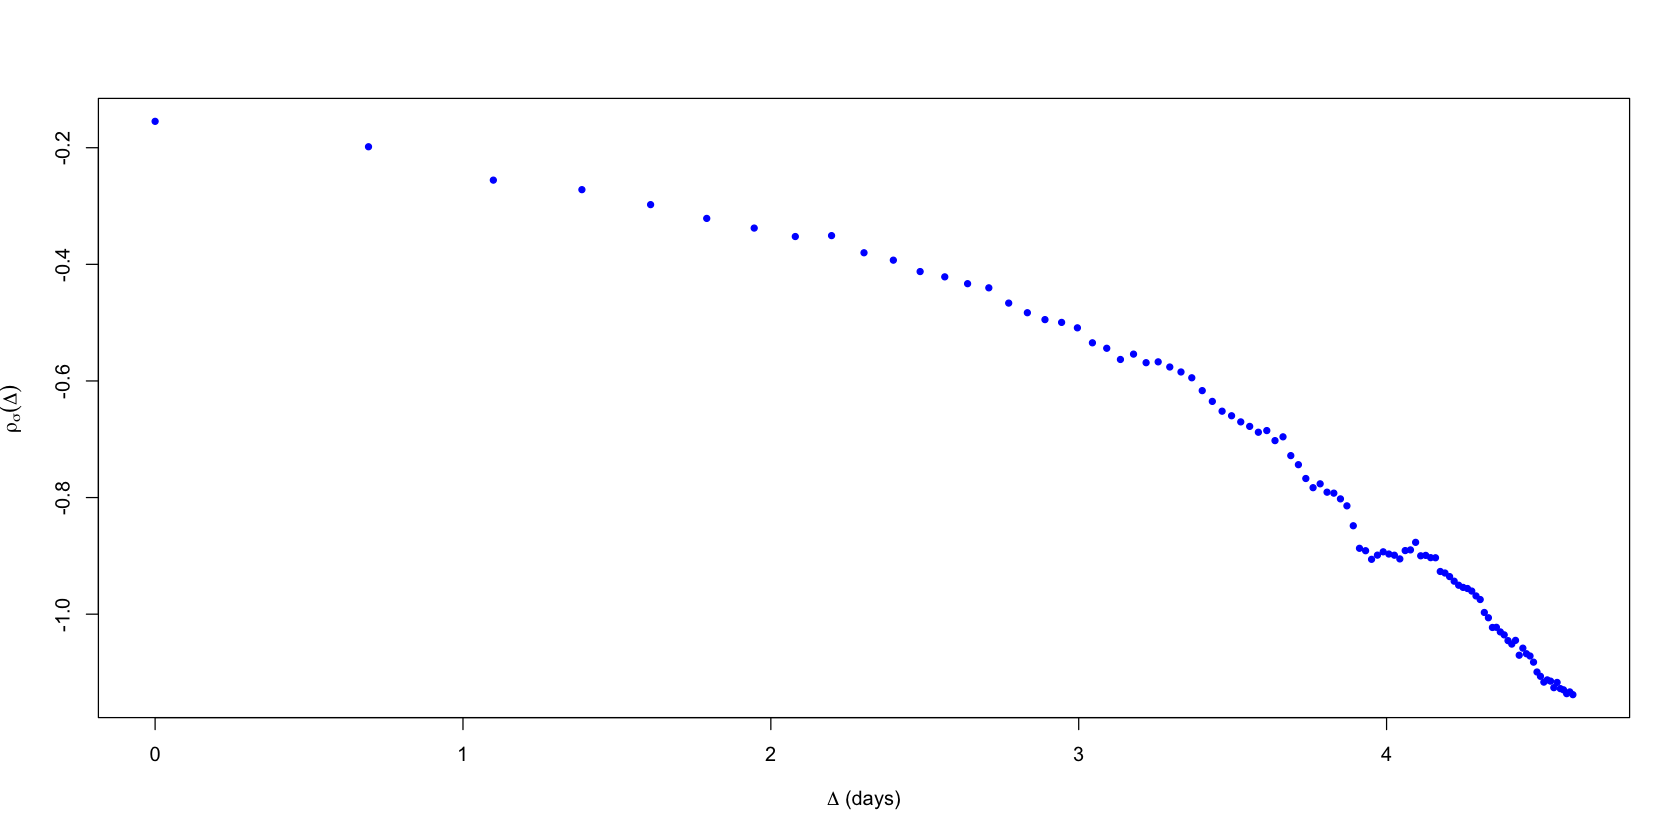

In [37]:
v <- as.numeric(rv.list[[".SPX"]]  )
ac.sig <- acf(sqrt(v),lag=100,plot=F)
plot(log(ac.sig$lag[-1]),log(ac.sig$acf[-1]),pch=20,
     ylab=expression(rho[sigma](Delta)),xlab=expression(paste(Delta," (days)")),col="blue")

Figure 12: A correlogram of $\sigma_t=\sqrt{RV_t}$; it doesn't look linear!

### Power-law fit

- We exclude the first 20 points so as to fit the tail.

In [38]:
(fit.lm <- lm(log(ac.sig$acf[-1][-(1:20)]) ~ log(ac.sig$lag[-1][-(1:20)])))


Call:
lm(formula = log(ac.sig$acf[-1][-(1:20)]) ~ log(ac.sig$lag[-1][-(1:20)]))

Coefficients:
                 (Intercept)  log(ac.sig$lag[-1][-(1:20)])  
                      0.7788                       -0.4136  


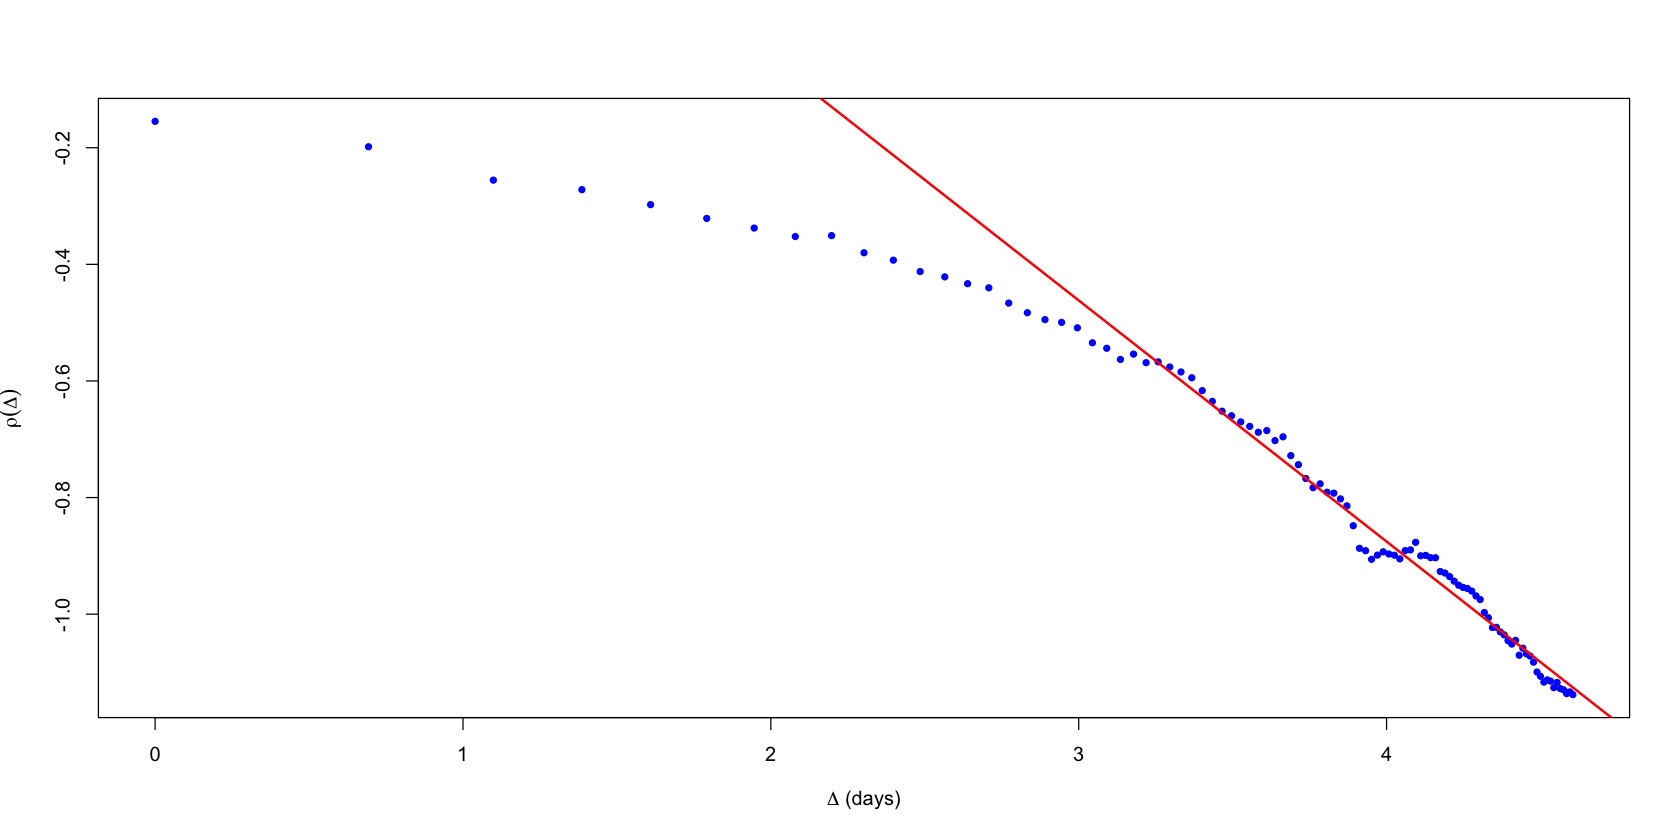

In [39]:
plot(log(ac.sig$lag[-1]),log(ac.sig$acf[-1]),pch=20,
     ylab=expression(rho(Delta)),xlab=expression(paste(Delta," (days)")),col="blue")
abline(fit.lm,col="red",lwd=2)

Figure 13: Correlogram of $\sigma_t=\sqrt{RV_t}$ with power-law fit.

- In other words, just fitting a straight line to the log-log plot of the autocorrelation $\rho_\sigma(\Delta)$ of the volatility we get
<p>
$$
\rho_\sigma(\Delta) \sim \Delta^{-0.4}
$$
as $\Delta \to \infty$.


- This corresponds to $d=0.3$, consistent with the $d=0.35$ found by <span>[Andersen, Bollerslev, Diebold and Ebens]<sup id="cite_ref-ABDE" class="reference"><a href="#cite_note-ABDE"><span>[</span>1<span>]</span></a></sup>.


- Note however that the correlogram does not look like a straight line on the log-log plot!

### Log-log plot of empirical autocorrelation of log volatility (correlogram)

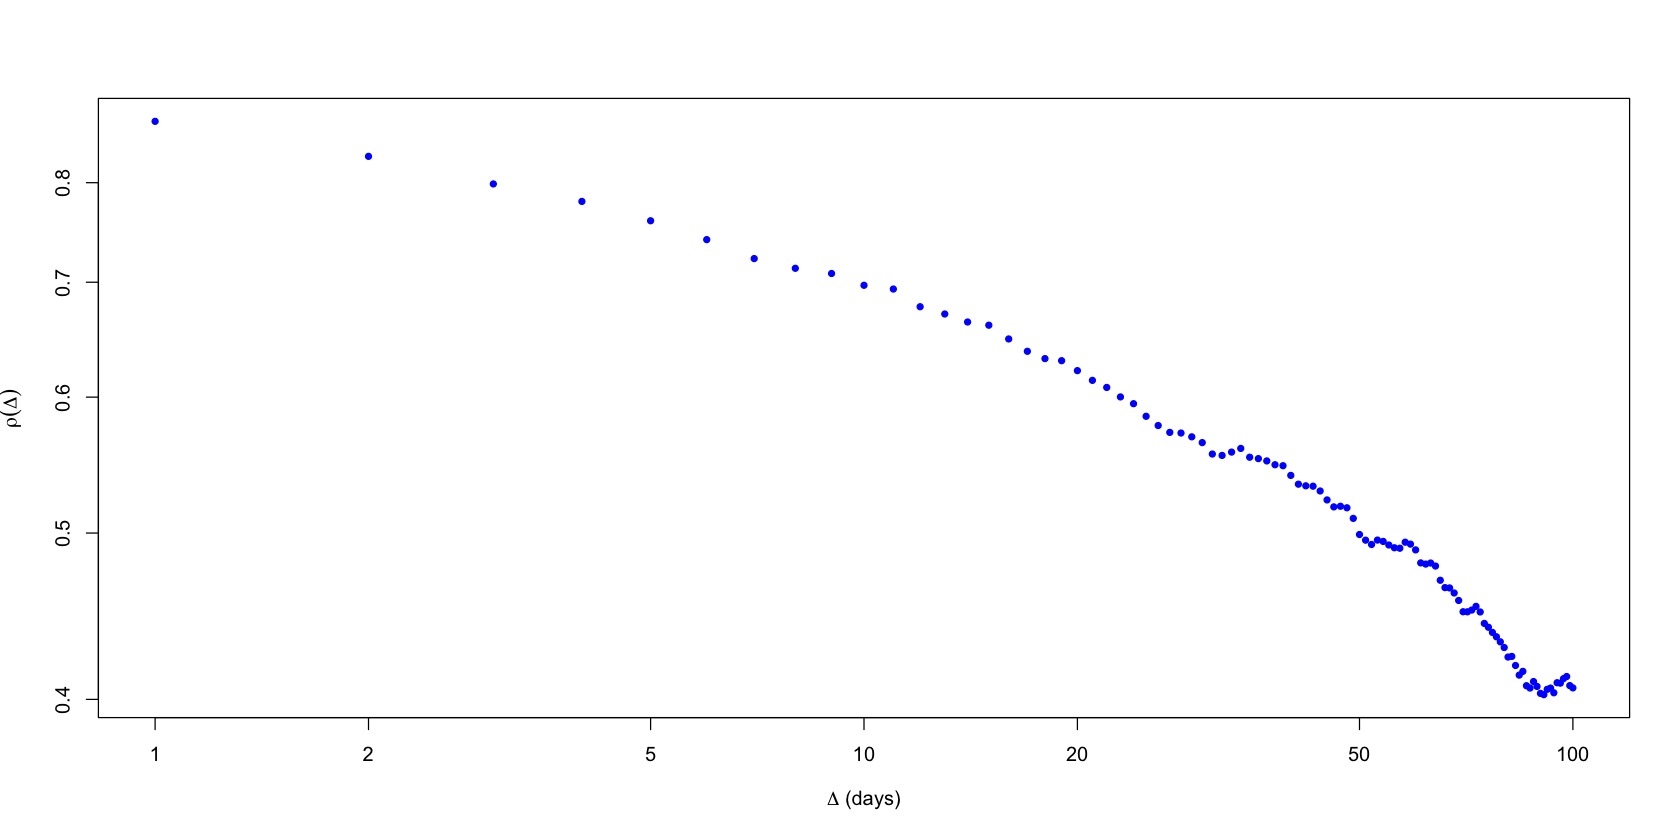

In [40]:
v <- rv.list[[".SPX"]]  
sig <- sqrt(as.numeric(v))
aclog <-acf(log(sig),lag=100,plot=F)
plot(aclog$lag[-1],aclog$acf[-1],pch=20,ylab=expression(rho(Delta)),
     xlab=expression(paste(Delta," (days)")),log="xy",col="blue")

Figure 13: A correlogram of $\log \sigma_t$; it doesn't look linear either!

### Heuristic derivation of autocorrelation function of log volatility

- In the RFSV model, it makes sense to compute the correlogram of log-volatility rather than volatility.

- We have $\log \sigma_t = \nu\,W^H_t + \text{const.}$.  Then
<p>
$$
\cov\left[\log \sigma_t,\log \sigma_{t+\Delta}\right]
=\frac{\nu^2}{2}\,\left\{   t^{2 H} + (t+\Delta)^{2 H} - \Delta ^{2 H}\right\}\\
$$
Similarly,
$$
\var\left[\log \sigma_t\right] = \nu^2\,t^{2\,H}.
$$

- Thus
$$
\rho_t(\Delta)=\frac{\cov\left[\log \sigma_t,\log \sigma_{t+\Delta}\right]}{\sqrt{\var\left[\log \sigma_t\right] \,\var\left[\log \sigma_{t+\Delta}\right] }} 
=\frac12\,\left\{\left(1+\frac t \Delta\right)^{-H} + \left(1+\frac t \Delta\right)^{H} - \left(\frac t \Delta\right)^{2 H}\, \left(1+\frac t \Delta\right)^{-H} \right\}
.
$$
<p>
    - Note the dependence on $t$!  The autocorrelation function has a dependence on sample size.
    <p>

    - In this version of the model with no mean reversion in volatility, 
    $\var[\log \sigma_t] \to \infty$ as $t \to \infty$.

### Implement the formula

In [41]:
rhoFormula <- function(delta,t,H){
    delt <- delta/t
    res <- 1/2*((1+delt)^(-H)+ (1+delt)^(H)  - delt^(2*H)*(1+delt)^(-H))
    return(res)
    }

### Fit the RFSV autocorrelation formula

In [42]:
obj.acf <- function(paramvec){
    t <- paramvec[1]
    H <- paramvec[2]
    delvec <- aclog$lag[-1]
    rho.acf <- aclog$acf[-1]
    rho.fit <- rhoFormula(delvec,t,H)
    return(sum((rho.acf-rho.fit)^2)*1e6)
}

In [43]:
optim(c(200,.1),obj.acf,method ="L-BFGS-B",lower=c(1,.0001),upper=c(100000,.5))

$par
[1] 24.6403939  0.2351917

$value
[1] 13414.49

$counts
function gradient 
      51       51 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

### Correlogram with fitted formula

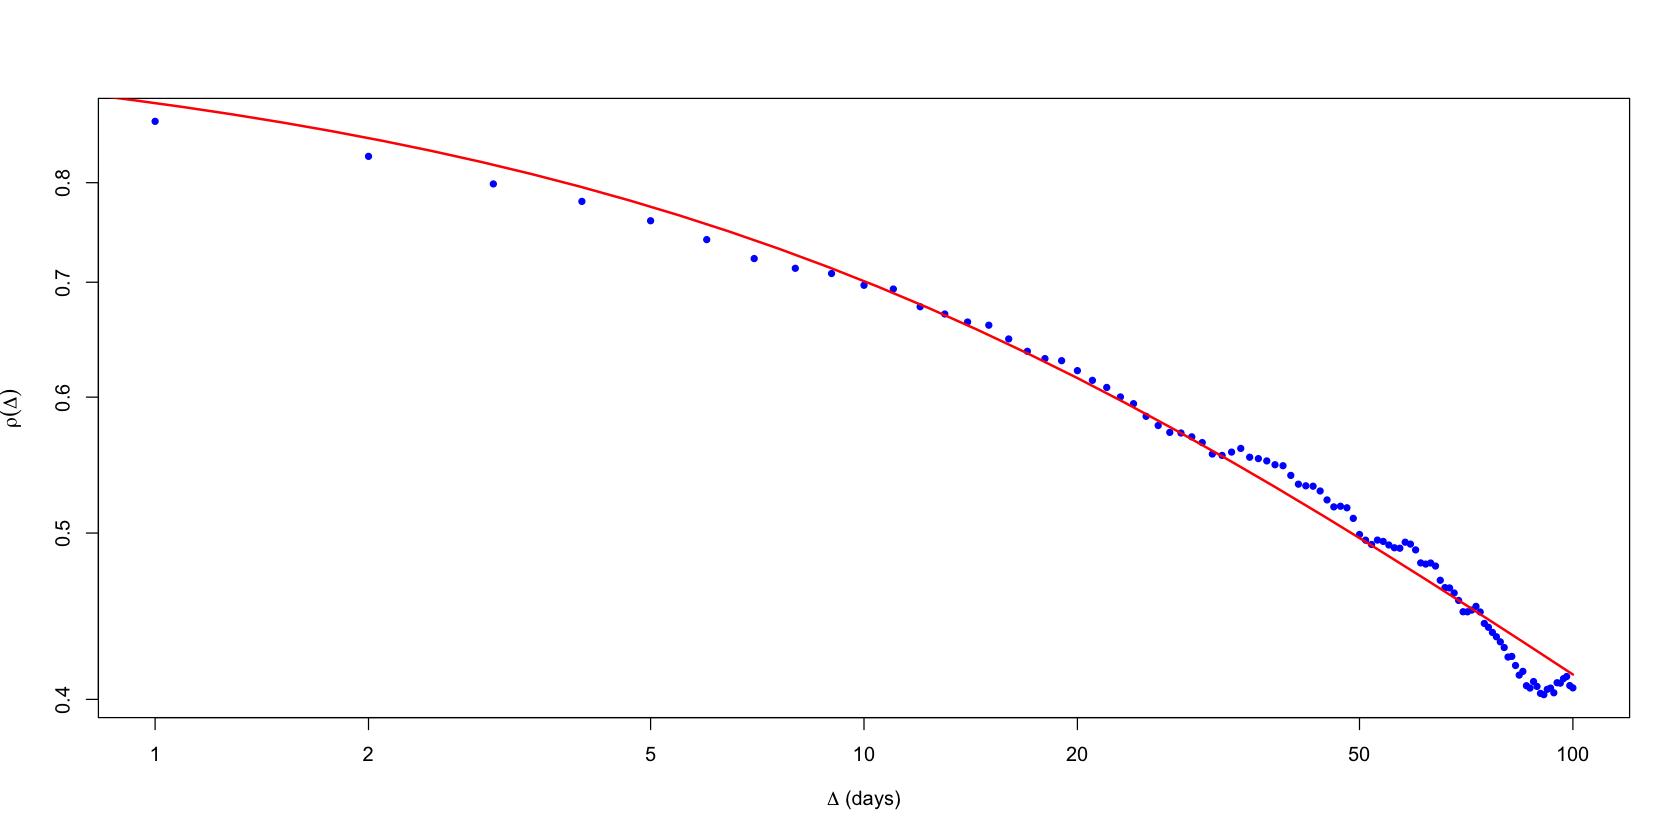

In [44]:
plot(aclog$lag[-1],aclog$acf[-1],pch=20,ylab=expression(rho(Delta)),
     xlab=expression(paste(Delta," (days)")),log="xy",col="blue")
curve(rhoFormula(x,24.64,.235),from=0.00001,to=100,add=T,col="red",lwd=2)

Figure 14: Here we superimpose the RFSV functional form $\rho_t(\Delta)$(in red) on the empirical curve (in blue).  The log-correlogram is not linear in the RFSV model!

### Superimpose half-sample correlograms

In [45]:
aclog1 <-acf(log(sig)[1:2499],lag=100,plot=F)
aclog2 <-acf(log(sig)[2500:4996],lag=100,plot=F)

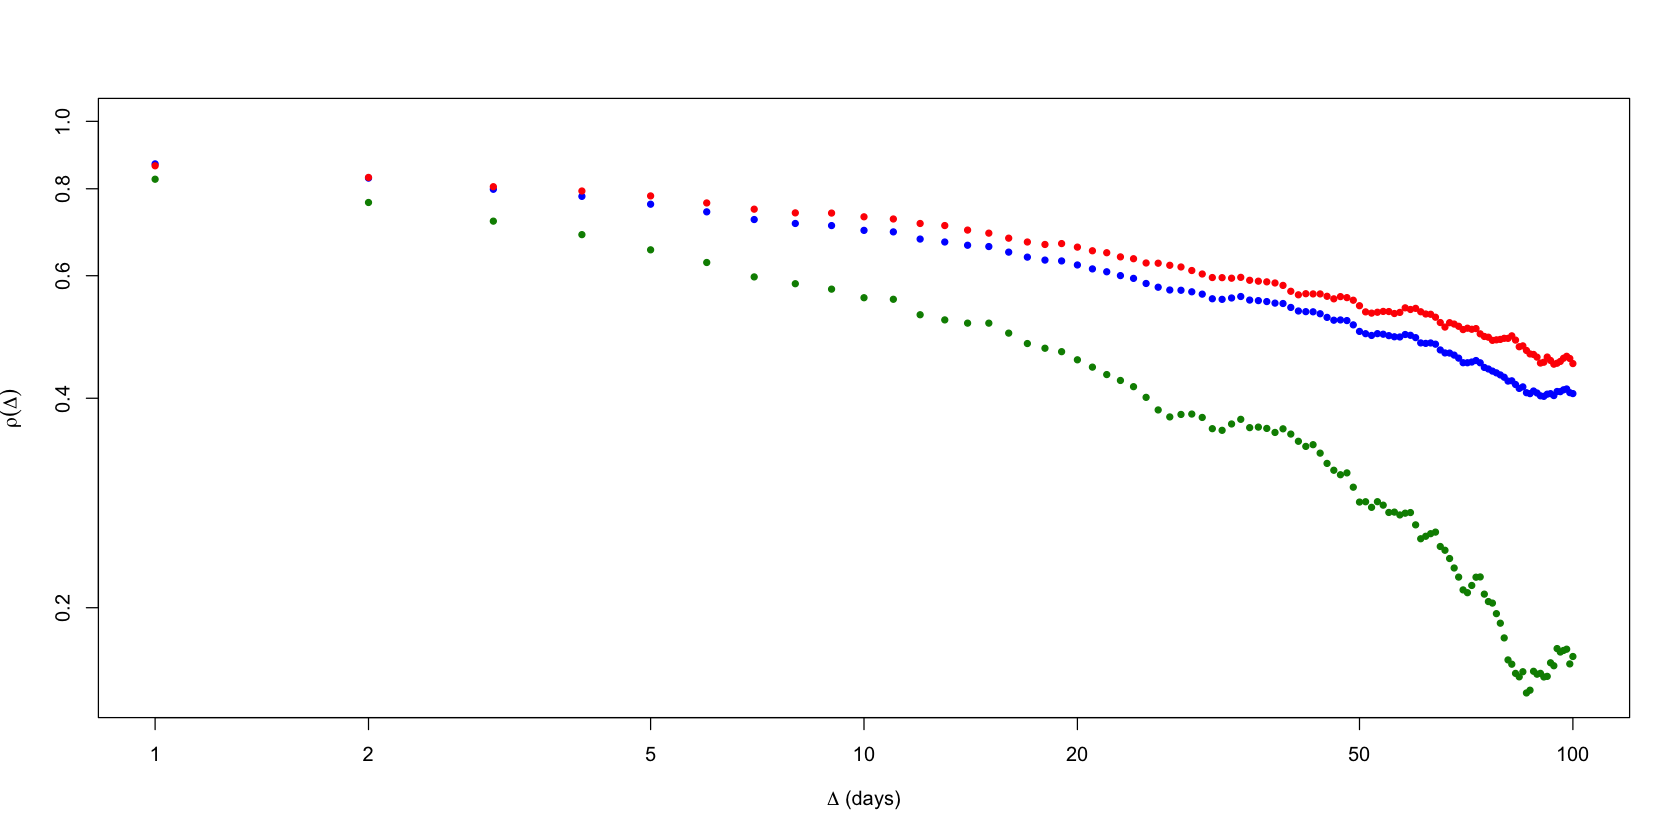

In [46]:
plot(aclog$lag[-1],aclog$acf[-1],pch=20,ylab=expression(rho(Delta)),ylim=c(0.15,1),
     xlab=expression(paste(Delta," (days)")),log="xy",col="blue")
points(aclog1$lag[-1],aclog1$acf[-1],pch=20,col="red")
points(aclog2$lag[-1],aclog2$acf[-1],pch=20,col="green4")

Figure 15: We see very different autocorrelation plots depending on the period of history.


- It does not make sense to estimate the empirical autocorrelation function of log-volatlity!

### Plot vs $\Delta^{2 H}$

- Again, we have $\log \sigma_t = \nu\,W^H_t + \text{const.}$ so
<p>
$$
\cov\left[\log \sigma_t,\log \sigma_{t+\Delta}\right]
=\var\left[\log \sigma_t\right] -\nu^2\,t^{2\,H} \,\Delta ^{2 H}.
$$


- Thus $\cov\left[\log \sigma_t,\log \sigma_{t+\Delta}\right]$ should be a linear function of $\Delta ^{2 H}$.


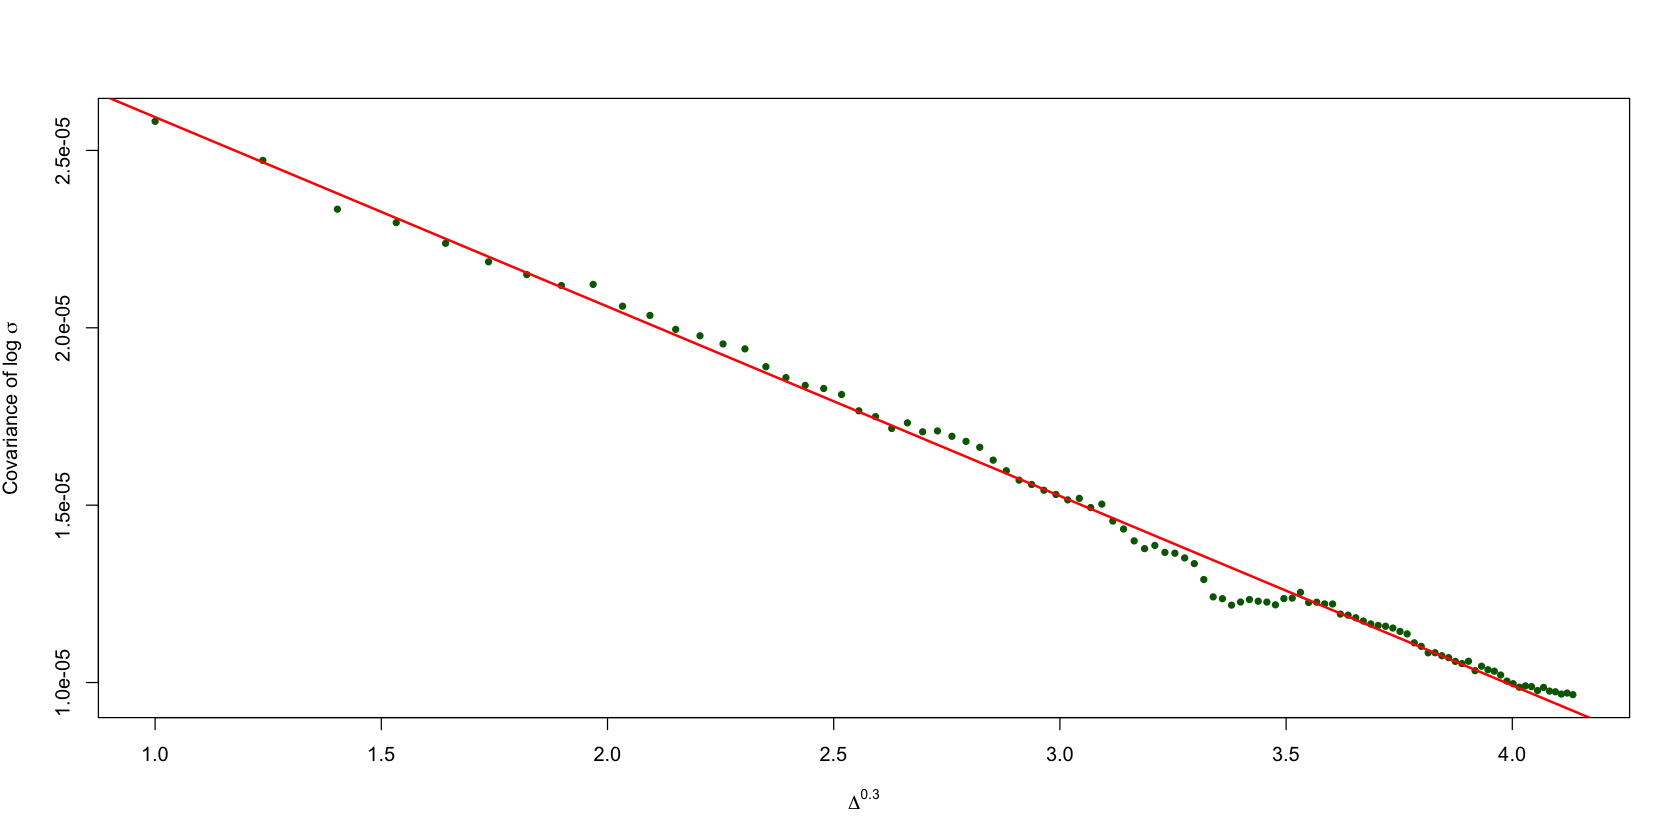

In [47]:
sig.cov <- acf(sig,lag.max=100,type="covariance",plot=F)$acf[-1]
x <- (1:100)^(2*h.spx.regression)
plot(x,sig.cov,pch=20,col="dark green",ylab= expression(paste("Covariance of log ",sigma)),xlab=expression(Delta^0.30 ))
abline(lm(sig.cov~x),col="red",lwd=2)

Figure 16: The data is very consistent with the RFSV model.


### Long memory of volatility may be spurious

 
- Figures 13,14,15, and 16 all demonstrate consistency of the realized kernel data with RFSV and are inconsistent with power-law decay of the autocorrelation function.
    - RFSV does not have this long memory property.


- Moreover, <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>6<span>]</span></a></sup> simulate volatility in the RFSV model and apply standard estimators to the simulated data.

    - Real data and simulated data generate very similar plots and similar estimates of the long memory parameter to those found in the prior literature.



- Classical estimation procedures seem to identify spurious long memory of volatility.


- Here is a quote from <span>[Bennedsen, Lunde and Pakkanen]<sup id="cite_ref-BLPdecoupling" class="reference"><a href="#cite_note-BLPdecoupling"><span>[</span>4<span>]</span></a></sup>:

> Having examined intraday volatility measurements on the E-mini S&P 500 futures contract, we can conclude that volatility is rough, highly persistent, and non-Gaussian. However, we were unable to distinguish between genuine long memory and persistence, yet technically short memory in the data.

 

### Incompatibility of FSV with realized variance (RV) data

 
  - In Figure 17, we demonstrate graphically that long memory volatility models such as FSV with $H>1/2$ are not compatible with the RV data.


  - In the FSV model, the autocorrelation function $\rho(\Delta) \propto \Delta^{2\,H-2}$.  Then, for long memory, we must have $1/2<H<1$.
    - For $\Delta \gg 1/\alpha$, stationarity kicks in and $m(2,\Delta)$ tends to a constant as $\Delta \to \infty$.
    - For $\Delta \ll 1/\alpha$, mean reversion is not significant and $m(2,\Delta) \propto \Delta^{2\,H}$.
  
 

### RFSV vs FSV

- We can compute $m(2,\Delta)$ explicitly in both the FSV and RFSV models.


- The smallest possible value of $H$ in FSV is $H=1/2$.  One empirical estimate in the literature says that $H \approx 0.53$ some time in 2008.  

- Let's see how the theoretical estimates of $m(2,\Delta)$ compare with data.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/FsvVsRFSV.png" align = "left" width=900></h3> 

Figure 17: Black points are empirical estimates of $m(2,\Delta)$; the blue line is the FSV model with $\alpha=0.5$ and $H=0.53$; the orange line is the RFSV model with $\alpha=0$ and $H=0.14$.


### Does simulated RSFV data look real?

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/11/volRealFake.png" align = "left" width=900></h3> 

Figure 18: Volatility of SPX (above) and of the RFSV model (below).

### Remarks on the comparison

 
  - In respect of roughness, the simulated and actual graphs look very alike. 
 
      - Persistent periods of high volatility alternate with low volatility periods. 
  
  
  - $H \sim 0.1$ generates very rough looking sample paths (compared with $H=1/2$ for Brownian motion).
 
 
  - Hence *rough volatility*.
 

 
  - On closer inspection, we observe fractal-type behavior.
 
 
  - The graph of volatility over a small time period looks like the same graph over a much longer time period.
 
 
  - This feature of volatility has been investigated both empirically and theoretically in, for example, <span>[Bacry and Muzy]<sup id="cite_ref-BacryMuzy" class="reference"><a href="#cite_note-BacryMuzy"><span>[3]</span></a></sup>
.
      - In particular, their Multifractal Random Walk (MRW) is related to a limiting case of the RSFV model as $H \to 0$.
  
 

### Applications

- What is this rough volatility model good for?


- If we could change measure from $\mP$ to $\mQ$, we would be able to price options.  
    - We will explore this after the break.
    
    
- Another obvious application is to volatility forecasting.

### Forcasting fBm

 
- In the RFSV model [(1)](#eq:dataDriven), $\log \sigma_t \approx \nu\,W^H_t+C$ for some constant $C$.


-  <span>[Nuzman and Poor]<sup id="cite_ref-NuzmanPoor" class="reference"><a href="#cite_note-NuzmanPoor"><span>[</span>14<span>]</span></a></sup> show that $W^H_{t+\Delta}$ is conditionally Gaussian with conditional expectation
<p>
$$\E[W^H_{t+\Delta}|\cF_t]=\frac{\cos(H\pi)}{\pi} \Delta^{H+1/2} \int_{-\infty}^t \frac{W^H_s}{(t-s+\Delta)(t-s)^{H+1/2}} ds
$$  
and conditional variance
<p>
$$
\text{Var}[W^H_{t+\Delta}|\cF_t]=\tilde c\,\Delta^{2H}.
$$
where $$
\tilde c = \frac{\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2H)}.
$$

 

### A heuristic explanation of the formula


- The forecast formula comes from regressing $W^H_{t+\Delta}$ against the $W^H_s$ with $s<t$.


- Let 
$$
\beta(u,\Delta) = \frac{\cos(H\pi)}{\pi} \Delta^{H+1/2}\frac{1} {(u+\Delta)\,u^{H+1/2}} .
$$
Then, for $t,\Delta>0$ and $0<H< \frac12$,
$$
\int_0^\infty\,\beta(u,\Delta)\,|t-u|^{2 H} \,du = (t+\Delta)^{2 H}.
$$
    - In particular, 
$$
\int_0^\infty\,\beta(u,\Delta)\,du=1.
$$




- With $\beta(u,\Delta) $ thus defined and for $s<t$,
<p>
$$
\ee{ W^H_s\,\left( W^H_{t+\Delta} - \int_{-\infty}^t\,\beta(t-u,\Delta)\,W^H_u\,du  \right)  } = 0.
$$
<p>
    - In other words, the $\beta(t-u,\Delta)$ are the normal regression coefficients.

### The forecast formula
 
Using that $W^H$ is a Gaussian random variable, we get that

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Variance forecast formula</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>

<a name="eq:vForecast"></a>(3)
$$
\eefm{v_{t+\Delta}}{\mP}=\exp\left\{\eefm{\log(v_{t+\Delta})}{\mP}+2\, \tilde c\,\nu^2\Delta^{2\,H}\right\}
%\label{eq:vForecast}
$$

<br>

</div>

</blockquote>

where 

\begin{eqnarray}
&&\eefm{\log v_{t+\Delta}}{\mP}\\
&&= \frac{\cos(H\pi)}{\pi} \Delta^{H+1/2} \int_{-\infty}^t \frac{\log v_s}{(t-s+\Delta)(t-s)^{H+1/2}} ds.
\end{eqnarray}

### Discretization of the forecast formula

In <span>[Gatheral, Jaisson, Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>4<span>]</span></a></sup>, we discretize the integral by taking mid-points as in 

$$
\eefm{\log v_{t+\Delta}}{\mP}
\approx  \frac 1A\, \sum_{j=0}^L\,\frac{\log v_{t-j}}{\left(j+\frac12+ \Delta\right)\,(j+\frac 12)^{H+1/2}}.
$$

where $L$ is the maximum number of lags and the normalizing constant $A$ is given by

$$
A = \sum_{j=0}^\infty\,\frac{1}{\left(j+\frac12+ \Delta\right)\,(j+\frac 12)^{H+1/2}}.
$$

Inspired by <span>[Bennedsen, Lunde and Pakkanen]<sup id="cite_ref-BLPdecoupling" class="reference"><a href="#cite_note-BLPdecoupling"><span>[</span>4<span>]</span></a></sup>, we approximate the first term in the sum more accurately as follows.

$$
\eefm{\log v_{t+\Delta}}{\mP}
\approx  \frac 1A\, \left\{ \frac{\log v_t}{(s^\star+ \Delta)\,(s^\star)^{H+1/2}} + 
\sum_{j=1}^L\,\frac{\log v_{t-j}}{(j+\frac12+ \Delta)\,(j+\frac 12)^{H+1/2}}\right\}
$$

where $s^\star$ is chosen such that

$$
\frac{1}{\gamma} = \int_0^1\,\frac{ds}{s^{H+\frac12}} = \frac{1}{{s^\star}^{H+\frac12}} = \frac{1}{{s^\star}^{1-\gamma}} 
$$

where $\gamma = \frac12-H$.  Thus

$$
s^\star = \gamma^{\frac{1}{1-\gamma}}.
$$

### Implement variance forecast in R

In [48]:
# Find all of the dates
dateIndex <- substr(as.character(index(spx.rk)),1,10) # Create index of dates

cTilde <- function(h){gamma(3/2-h)/(gamma(h+1/2)*gamma(2-2*h))} # Factor because we are computing conditional on \cF_t

# XTS compatible version of forecast
rv.forecast.XTS <- function(rvdata,h,date,nLags,delta,nu){
    gam <- 1/2-h
    j <- (1:nLags)-1
    cf <- 1/((j+1/2)^(h+1/2)*(j+1/2+delta)) # Lowest number should apply to latest date
    s.star <- gam^(1/(1-gam))
    cf[1] <- 1/(s.star^(h+1/2)*(s.star+delta))
    datepos <- which(dateIndex==date)
    ldata <- log(as.numeric(rvdata[datepos-j])) # Note that this object is ordered from earlier to later
    pick <- which(!is.na(ldata))
    norm <- sum(cf[pick])
    fcst <- cf[pick]%*%ldata[rev(pick)]/norm # Most recent dates get the highest weight
    return(exp(fcst+2*nu^2*cTilde(h)*delta^(2*h)))

    }

### SPX actual vs forecast variance

- In order to forecast using (3), we need estimates of $H$ and $\nu$.

    - We use our estimates of $H$ and $\nu$ from the regressions rather than from the ACF estimator.
    - The choice does not seem to make much difference.
    
    


In [49]:
var.forecast.spx <- function(h,nu)function(del){
    n <- length(spx.rk)
    nLags <- 200
    
    range <- nLags:(n-del)
    rv.predict <- sapply(dateIndex[range],function(d){rv.forecast.XTS(rvdata=spx.rk,h,d,nLags=nLags,delta=del,nu)})
    rv.actual <- spx.rk[range+del]
    return(list(rv.predict=rv.predict,rv.actual=rv.actual))
    }

- From experiment, we found that around 200 lags works best.


### Scatter plot of delta days ahead predictions

In [50]:
del <- 1
vf <- var.forecast.spx(h=h.spx.regression,nu=nu.spx.regression)(del)
rv.predict <- vf$rv.predict
rv.actual <- vf$rv.actual
vol.predict <- sqrt(as.numeric(rv.predict))
vol.actual <- sqrt(as.numeric(rv.actual))
vol.actual <-  sqrt(as.numeric(rv.actual))                  

In [51]:
c(mean(vol.actual-vol.predict),sd(vol.actual-vol.predict))

[1] -0.0003384069  0.0026690086

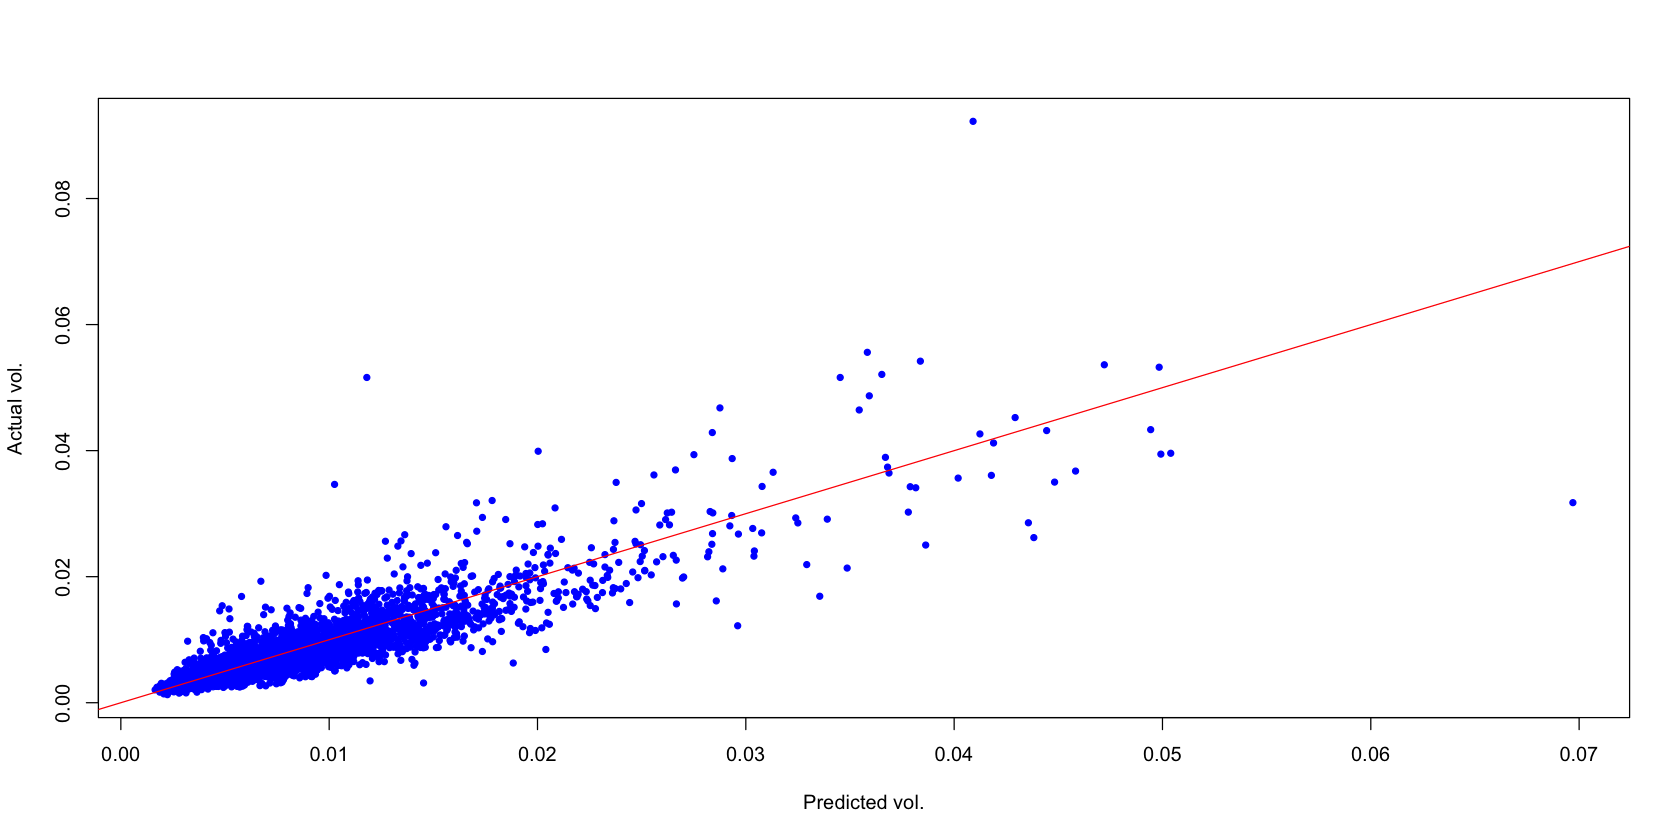

In [52]:
plot(vol.predict,vol.actual,col="blue",pch=20, ylab="Actual vol.", xlab="Predicted vol.")
abline(coef=c(0,1),col="red")

Figure 19: Actual vols vs predicted vols.

Which point is the outlier?

In [53]:
rv.actual[which(as.numeric(vol.actual)>.09)]

                  [,1]
2008-10-10 0.008509655

In [54]:
rv.predict[which(as.numeric(vol.predict)>.06)]

2008-10-10 
0.004858162

### Superimpose actual and predicted vols

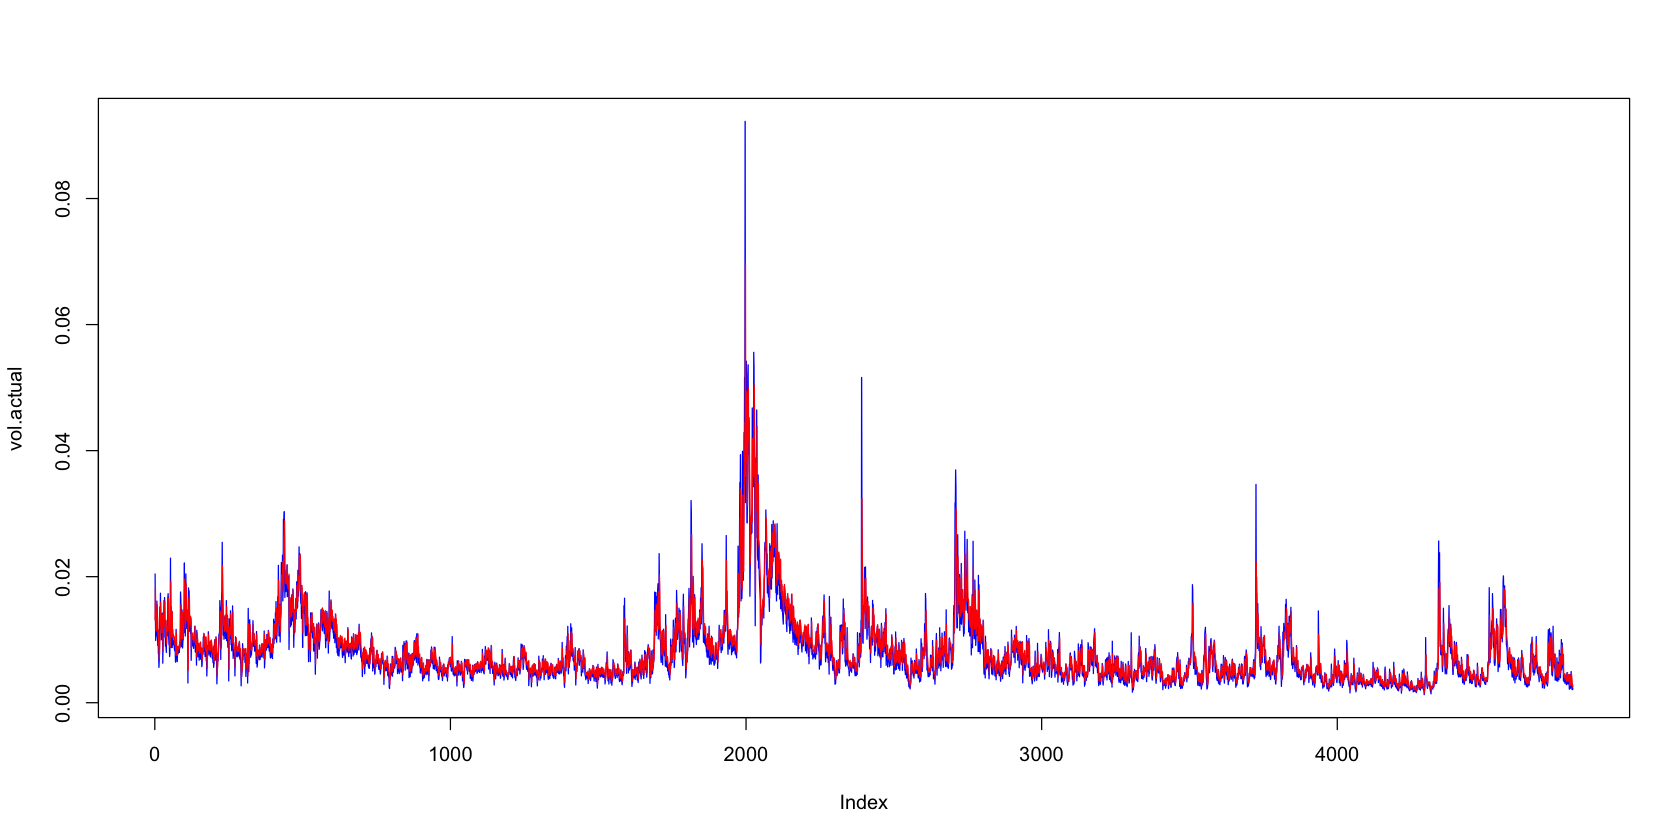

In [55]:
plot(vol.actual, col="blue",type="l")
lines(vol.predict, col="red",type="l")

Figure 20: Actual volatilities in blue; predicted vols in red.  Note that volatilities are in daily terms.

### VolX

- The commercial company VolX (http://volx.us) has developed a number of RealVol Instruments and RealVol Indices based on realized volatility as defined by the RealVol Formulas.
    - Their business model is to license these indices to exchanges and information providers.


- They publish daily forecasts of RV using HARK (which is HAR-RV with Kalman filtering, and RVOL, an implementation of the Rough Volatility forecast.


- You can compare forecast versus actual volatility for the two estimators here: http://www.volx.us/volatilitycharts.shtml?2&SPY&PRED.

### VolX screenshots

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/11/RVol2019.png" align = "center" width=750></h2>

### Rough Volatility and HAR error histograms

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/11/RVolDist2019.png" align = "center" width=750></h2>
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/11/HVolDist2019.png" align = "center" width=750></h2>

### Conditional and unconditional variances

- The HAR and rough volatility forecasts are both impressive.
    - Much superior to alternatives such as GARCH.
    
- However, HAR is a regression and rough volatility is a proper model.


- One practical consequence is that we can put error bars on our volatility forecasts.

### So how good is the forecast?

Specifically, by how much is the variance of the future variance reduced by taking into account the whole history  of the fBm?
- In practice of course, we only consider some finite history, 200 points say.

- We know this again from <span>[Nuzman and Poor]<sup id="cite_ref-NuzmanPoor" class="reference"><a href="#cite_note-NuzmanPoor"><span>[</span>10<span>]</span></a></sup> who showed that the ratio of the conditional to the unconditional variance of the $\log v_t$ is

$$
\tilde c = \frac{\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2H)}.
$$


- We can compute this ratio empirically and compare with the model prediction.

### Load some data

In [56]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/11/9875-13.zip", destfile="9875-13.zip")
unzip(zipfile="9875-13.zip")

### Unconditional and conditional variance vs lag $\Delta$

First we compute the time series of prediction errors.

In [57]:
log.vol.err <- function(del){
    vf <- var.forecast.spx(h=h.spx.regression,nu=nu.spx.regression)(del)
    rv.predict <- vf$rv.predict
    rv.actual <- vf$rv.actual
    vol.predict <- sqrt(as.numeric(rv.predict))
    vol.actual <-  sqrt(as.numeric(rv.actual)) 
    err <- log(vol.actual)-log(vol.predict)
    return(err)
    }

In [58]:
var.log.err <- function(del){
    var(log.vol.err(del))
}

In [59]:
var.log.err(10)

[1] 0.1359282

The following code takes too long to run.  You can run it by uncommenting the code.

In [60]:
del <- 1:100
#var.log.err.del <- sapply(del,var.log.err)

In [61]:
#save(var.log.err.del ,file="varerr201911.rData")
load(file="varerr201911.rData")

### Plot of conditional and unconditional variance

- The unconditional variance of differences in log-vol is given by

$$
m(2,\Delta)=\angl{\left(\log \sigma_{t+\Delta} -\log \sigma_{t} \right)^2}.
$$

- The conditional variance is given by `var.log.err`$(\Delta)$.




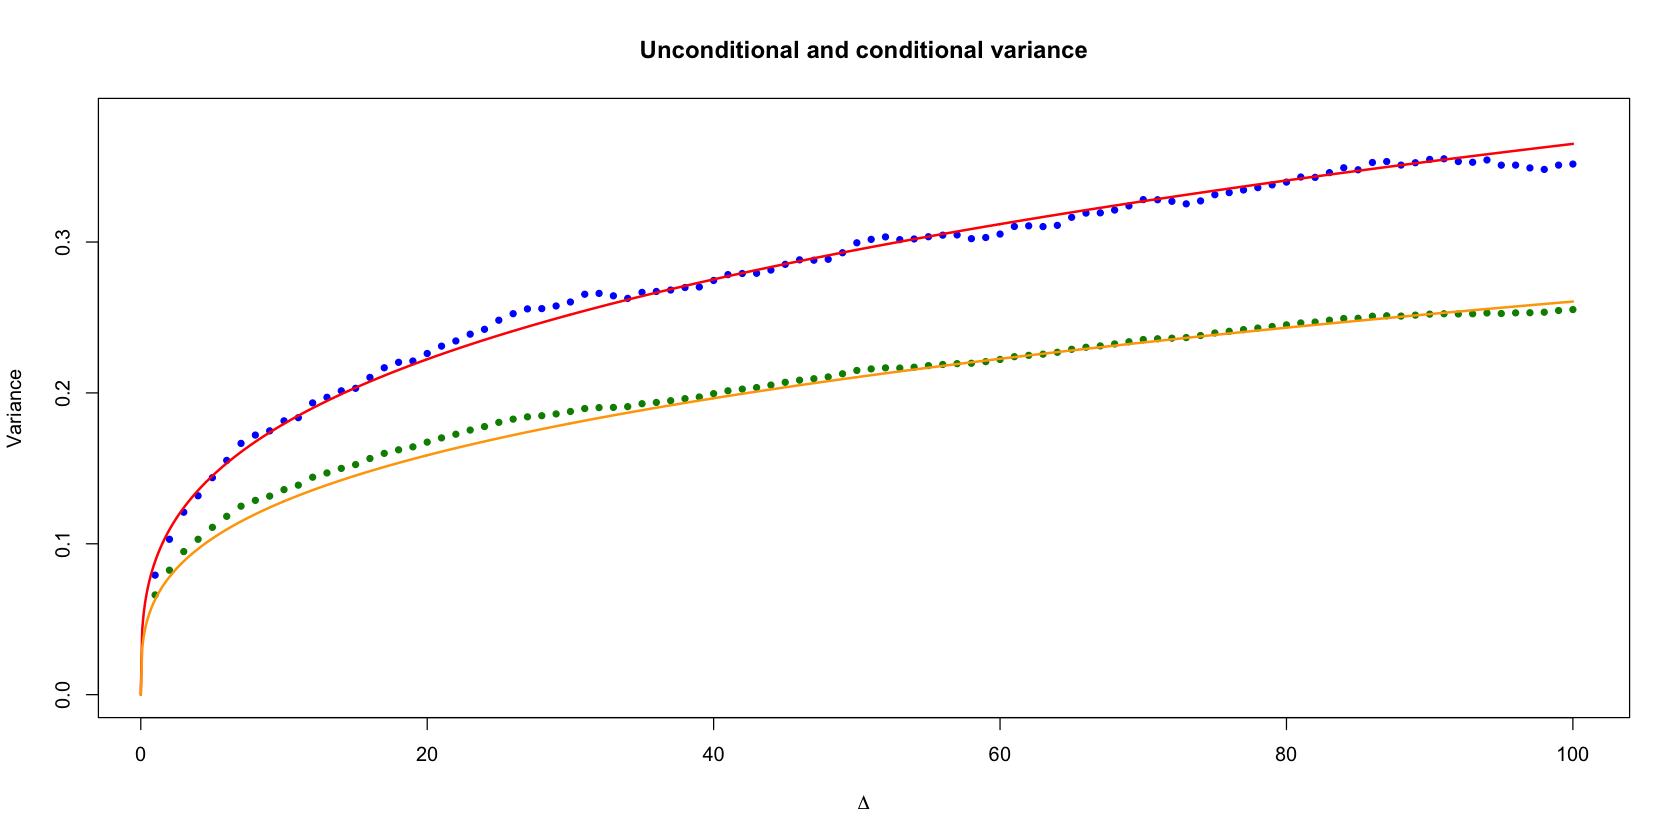

In [62]:
plot(del,mq.del(del,2),pch=20,cex=1,ylab=expression(Variance), 
     xlab=expression(Delta),col="blue",ylim=c(0,.38),
     main= "Unconditional and conditional variance")
curve(nu.spx.regression^2*x^(2*h.spx.regression),from=0,to=100,add=T,col="red",lwd=2,n=1000)
points(del,var.log.err.del,col="green4",pch=20)
curve(cTilde(h.spx.regression)* nu.spx.regression^2*x^(2*h.spx.regression),from=0,to=100,
      add=T,col="orange",lwd=2,n=1000)

Figure 21: Actual unconditional variance in blue, rough volatility prediction in red; Actual conditional variance in green, rough volatility prediction in orange.

### Amazing agreement between data and model

- We observe that the ratio of conditional to unconditional variance is more or less *exactly* as predicted by the model!

### Pricing under rough volatility

Following <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>4<span>]</span></a></sup>, the foregoing behavior suggest the following model for volatility under the real (or historical or physical) measure $\mP$:

$$
\log \sigma_u - \log \sigma_t =\nu\,\left(W^H_u-W^H_t\right), \quad u>t.
$$

Let $\gamma=\frac{1}{2}-H$.  We choose the Mandelbrot-Van Ness representation of fractional Brownian motion $W^H$ as follows:

$$
W^H_t ={C_H}\,\left\{\int_{-\infty}^t \,\frac{dW^{\mP}_s}{(t-s)^\gamma} - \int_{-\infty}^0 \,\frac{dW^{\mP}_s}{(-s)^\gamma}\right\}
$$

where the choice

$$
C_H = \sqrt{ \frac{2\,H\,\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2\,H)}}
$$

ensures that
$$
\E\left[W^H_t\,W^H_s\right]= \frac{1}{2}\,\left\{t^{2 H} + s^{2 H} - |t-s|^{2 H}\right\}.
$$

Then

\begin{eqnarray}
&&\log v_u - \log v_t \nonumber\\
&=&2 \,\nu\,C_H\,\left\{ \int_t^u\,\frac{1}{(u-s)^\gamma}\,d{W}^{\mP}_s  \\+\int_{-\infty}^t\,\left[ \frac{1}{(u-s)^\gamma}-\frac{1}{(t-s)^\gamma} \right]\,d{W}^{\mP}_s\right\}\nonumber\\
&=:& 2\,\nu\,C_H\,\left[M_t(u)+ Z_t(u)\right].
\end{eqnarray}

- Note that $\eefm{M_t(u)}{\mP}=0$ and $Z_t(u)$ is $\cF_t$-measurable.  

  - To price options, it would seem that we would need to know $\cF_t$, the entire history of the Brownian motion $W_s$ for $s<t$!

  

### Pricing under $\mP$


Let

$$
\tilde W^{\mP}_t(u) := \sqrt{2\,H}\,\int_t^u\,\frac{dW^{\mP}_s}{(u-s)^\gamma}
$$

With 
$\eta := 2\,\nu\,C_H/\sqrt{2\,H}$ we have $2\,\nu\,C_H\, M_t(u)
= \eta\, \tilde W^{\mP}_t(u)$ so denoting the stochastic exponential by $\cE(\cdot)$, we may write

\begin{eqnarray}
v_u &=& v_t \exp\left\{  \eta \tilde W^{\mP}_t(u) +
 2\,\nu\,C_H\, 
Z_t(u) \right\}\nonumber\\
&=& \eefm{v_u}{\mP}\,\cE \left(\eta\,\tilde W^{\mP}_t(u) \right).
%\label{eq:rBergomiP}
\end{eqnarray} 
 

  - The conditional distribution of $v_u$ depends on $\cF_t$ only through the variance forecasts $\eefm{v_u}{\mP}$, 
 
 
 - To price options, one does not need to know $\cF_t$, the entire history of the Brownian motion $W_s^{\mP}$ for $s<t$.

 

### Pricing under $\mQ$

Our model under $\mP$ reads:

<a name="eq:Pmodel"></a>(2)
$$
v_u =\eefm{v_u}{\mP}\,\cE\left(\eta\,\tilde W^{\mP}_t(u) \right).
%\label{eq:Pmodel}
$$

Consider some general change of measure

$$
dW^{\mP}_s = dW^{\mQ}_s + \lambda_s\,ds,
%\label{eq:dQdP}
$$

where $\{ \lambda_s: s > t \}$  has a natural interpretation as the price of volatility risk.  We may then rewrite [(2)](#eq:Pmodel) as

$$
v_u
=  \eefm{v_u}{\mP}\,\cE\left(\eta\,\tilde W^{\mQ}_t(u) \right)
\exp \left\{ \eta\,\sqrt{2\,H}\, \int_t^u\,\frac{\lambda_s}{(u-s)^\gamma}\,ds\right\}.
%\label{eq:explicitBergomiQ1}
$$
 

- Although the conditional distribution of $v_u$ under $\mP$ is lognormal, it will not be lognormal in general under $\mQ$.  
 
  - The upward sloping smile in VIX options means $\lambda_s$ cannot be deterministic in this picture.

### The rough Bergomi (rBergomi) model

Let's nevertheless consider the simplest change of measure 

$$
d{W}^{\mP}_s = d{W}^{\mQ}_s + \lambda(s)\,ds, 
$$

where $\lambda(s)$ is a deterministic function of $s$.  Then from [(2)](#eq:Pmodel), we would have

\begin{eqnarray}
v_u 
&=&  \eefm{v_u}{\mP}\,\cE\left(\eta\,\tilde W^{\mQ}_t(u) \right)
\exp \left\{ \eta\,\sqrt{2\,H}\,  \int_t^u\,\frac{1}{(u-s)^\gamma}\,\lambda(s)\,ds\right\}\nonumber\\
&=& \xi_t(u) \,\cE\left(\eta\,\tilde W^{\mQ}_t(u) \right)%\label{eq:explicitBergomiQ}
\end{eqnarray}

where the forward variances $\xi_t(u) =  \eefm{v_u}{\mQ}$ are (at least in principle) tradable and  observed in the market.

 

  -  $\xi_t(u)$ is the product of two terms:
  
  - $ \eefm{v_u}{\mP}$ which depends on the historical path $\{W_s, s<t \}$ of the Brownian motion
  - a term which depends on the price of risk $\lambda(s)$.
  
  

### Features of the rough Bergomi model


 - The rBergomi model is a non-Markovian generalization of the Bergomi model:
$$
\eef{v_u}\neq \E[v_u|v_t].
$$
    - The rBergomi model is Markovian in the (infinite-dimensional) state vector $\eefm{v_u}{\mQ}=\xi_t(u)$.


  - We have achieved our earlier aim of replacing the exponential kernels in the Bergomi model with a power-law kernel.  
 
- We may therefore expect that the rBergomi model will generate a realistic term structure of ATM volatility skew.

### Re-interpretation of the conventional Bergomi model

 
  - A conventional $n$-factor Bergomi model is not self-consistent for an arbitrary choice of the initial forward variance curve $\xi_t(u)$.
 
 - $\xi_t(u)=\eef{v_u}$ should be consistent with the assumed dynamics.
  
  

- Viewed from the perspective of the fractional Bergomi model however:
 
  - The initial curve $\xi_t(u)$ reflects the history $\{W_s; s<t\}$ of the driving Brownian motion up to time $t$.
  - The exponential kernels in the exponent of the conventional Bergomi model approximate more realistic power-law kernels.
  

  - The conventional two-factor Bergomi model is then justified in practice as a tractable Markovian engineering approximation to a more realistic fractional Bergomi model.

### The stock price process

 
- The observed anticorrelation between price moves and volatility moves may be  modeled naturally by anticorrelating the Brownian motion $W$ that drives the volatility process with the Brownian motion driving the price process.  


- Thus
$$
\frac{dS_t}{S_t}=\sqrt{v_t}\,dZ_t
$$
with
$$
dZ_t = \rho\,dW_t + \sqrt{1-\rho^2}\,dW^\perp_t
$$
where $\rho$ is the correlation between volatility moves and price moves.
  

### Simulation of the  rBergomi model

We simulate the rBergomi model as follows:
 


- Construct the  joint covariance matrix for the Volterra process $\tilde
  W$ and the Brownian motion $Z$ and compute its Cholesky decomposition.


- For each time, generate iid normal random vectors and
    multiply them by the lower-triangular matrix obtained by the Cholesky
    decomposition to get a $m \times 2\,n$ matrix of paths of $\tilde W$     and $Z$ with the correct joint marginals.

- With these paths held in memory, we may evaluate the expectation under $\mQ$ of any payoff of interest.




- This procedure is very slow!  We need a faster computation.

  

### Hybrid simulation of BSS processes

- The Rough Bergomi variance process is a special case of a Brownian Semistationary (BSS) process.


- <span>[Bennedsen, Lunde and Pakkanen]<sup id="cite_ref-BLP" class="reference"><a href="#cite_note-BLP"><span>[</span>5<span>]</span></a></sup> show how to simulate such processes more efficiently.
    
    
- More recently, [McCrickerd and Pakkanen]<sup id="cite_ref-Turbo" class="reference"><a href="#cite_note-Turbo"><span>[</span>15<span>]</span></a></sup> show how to massively increase the efficiency of the hybrid scheme.
    - They even provide a sample Jupyter notebook!

- Their idea is roughly as follows:
<p>
\begin{eqnarray}
\int_t^u\,\frac{dW_s}{(u-s)^\gamma} &=& \sum_{k=1}^{n}\, \int_{t_{k+1}}^{t_k}\,\frac{dW_s}{(u-s)^\gamma}\\ &\approx&
\sum_{k=1}^{\kappa}\, \int_{t_{k+1}}^{t_k}\,\frac{dW_s}{(u-s)^\gamma} + \sum_{k=\kappa+1}^n\,\frac{1}{(u-s_k)^\gamma}\, \int_{t_{k+1}}^{t_k}\,dW_s\\
&=&
\sum_{k=1}^{\kappa}\, \int_{t_{k+1}}^{t_k}\,\frac{dW_s}{(u-s)^\gamma} + \sum_{k=\kappa+1}^n\,\frac{1}{(u-s_k)^\gamma}\, Z_k\,\sqrt{\frac{u-t}{n}}
\end{eqnarray}
    
where
$
t_k = u - \frac k n (u-t)
$,
the $Z_k$ are iid $N(0,1)$ random variables and the 
$
s_k  
$
are such that
$$
\int_{t_{k+1}}^{t_k}\,\frac{ds}{(u-s)^\gamma} = \frac{1}{(u-s_k)^\gamma}.
$$

- The choice $\kappa =1$ works well in practice.
- The choice $\kappa = 0$ corresponds to the Euler scheme which as expected performs poorly.

### Guessing rBergomi model parameters

 
- The rBergomi model has only three parameters: $H$, $\eta$ and $\rho$.


- If we had a fast simulation, we could just iterate on these parameters to find the best fit to observed option prices.  But we don't.

- However, the model parameters $H$, $\eta$ and $\rho$ have very direct interpretations:
 
    - $H$ controls the decay of ATM skew $\psi(\tau)$ for very short expirations.
    
    - The product $\rho\,\eta$ sets the level of the ATM skew for longer expirations.
    
      - Keeping  $\rho\,\eta$ constant but decreasing $\rho$ (so as to make it more negative) pushes the minimum of each smile towards higher strikes. 
  

- So we can guess parameters in practice.


- As we will see, even without proper calibration (*i.e.* just guessing parameters), rBergomi model fits to the volatility surface are amazingly good.

### SPX smiles in the rBergomi model

 
- In Figures 22 and 23, we show how well a rBergomi model simulation with guessed parameters fits the SPX option market as of August 14, 2013, one trading day before the third Friday expiration.


- Options set at the open of August 16, 2013 so only one trading day left.
    - rBergomi parameters were: $H=0.05$, $\eta=2.3$, $\rho=-0.9$.
    - Only three parameters to get a very good fit to the whole SPX volatility surface!


- Note in particular that the extreme short-dated smile is well reproduced by the rBergomi model.
    - There is no need to add jumps!

### SPX smiles as of August 14, 2013

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/02/spxSmiles20130814-05.png" align = "left" width=900></h3> 

Figure 22: Red and blue points represent bid and offer SPX implied volatilities; orange smiles are from the rBergomi simulation.

### The one-month SPX smile as of August 14, 2013

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/07/Paris2017smiles20130814-1m.png" align = "left" width=1200></h3> 

Figure 23: Red and blue points represent bid and offer SPX implied volatilities; orange smile is from the rBergomi simulation.

### ATM volatilities and skews
In Figures 24 and 25, we see just how well the rBergomi model can match empirical skews and vols.  Recall also that the parameters we used are just guesses!

### Term structure of ATM skew as of August 14, 2013

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/07/Paris2017atmSkew20130814.png" align = "left" width=1200></h3> 

Figure 24: Blue points are empirical skews; the red line is from the rBergomi simulation.

### Term structure of ATM vol as of August 14, 2013

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/07/Paris2017atmVols20130814.png" align = "left" width=1200></h3> 

Figure 25: Blue points are empirical ATM volatilities; green points are from the rBergomi simulation. The two match very closely, as they should. 

### VIX options and futures under rough Bergomi

- The rough Bergomi model generates more or less flat VIX smiles.
    - Inconsistent with observed VIX smiles.
    
    
- Nevertheless, we can still try to impute the rough Bergomi parameters $H$ and $\eta$ by examining the term structure of VIX futures.  

### The distribution of VIX future payoffs


- Denote the terminal value of the VIX futures by $\sqrt{\zeta(T)}$.  Then, by definition (see Chapter 11 of <span>[The Volatility Surface]<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS"><span>[</span>8<span>]</span></a></sup> for more details),
<p>
$$
\zeta(T)= \frac{1}{\Delta}\,\int_T^{T+\Delta}\,\E[v_u|\cF_T]\,du.
$$
<p>
where $\Delta$ is one month.



- In the rough Bergomi model,
<p>
$$
v_u = \xi_t(u)\,\cE\left(\eta\,\sqrt{2\,H}\,\int_t^u\frac{dW_s}{(u-s)^\gamma}\right)
$$
<p>
with $\gamma=1/2-H$ so $v_u$ is lognormal.

### The lognormal approximation


- The VIX payoff and its square $\zeta(T)$ should be approximately lognormally distributed.
    -  The quality of this approximation was confirmed by <span>[Jacquier, Martini and Muguruza]<sup id="cite_ref-JMM" class="reference"><a href="#cite_note-JMM"><span>[</span>12<span>]</span></a></sup>.
    - In that case, the terminal distribution of $\zeta(T)$ is completely determined by $\eef{\zeta(T)}$ and $\var[\log \zeta(T)|\cF_t]$.

- Obviously
<p>
$$
\eef{\zeta(T)} = \frac{1}{\Delta}\,\int_T^{T+\Delta}\,\xi_t(u)\,du.
$$
<p>
    - Recall that forward variances $\xi_t(u)$ may be estimated from variance swaps which can themselves be proxied by the log-strip (see Chapter 11 of <span>[The Volatility Surface]<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS"><span>[</span>8<span>]</span></a></sup> again).
    
    - Alternatively they may be estimated from linear strips of VIX options.

### Approximating the conditional variance of $\zeta(T)$


- To estimate the conditional variance of $\zeta(T)$, we approximate the arithmetic mean by the geometric mean as follows:
<p>
$$
\zeta(T) \approx \exp\left\{\frac{1}{\Delta}\,\int_T^{T+\Delta}\,\E[\log v_u|\cF_T]\,du\right\}.
$$
<p>

Let $y_u = \log v_u$ and recall that $\gamma = \frac12 - H$.  Apart from $\mathcal{F}_t$ measurable terms (abbreviated as ``drift''), we have

\begin{eqnarray}
  \int_T^{T+\Delta} E[y_u|\mathcal{F}_T]\, du &=& \eta \sqrt{2H} \int_t^T
  \frac{dW_s}{(u-s)^\gamma} du + \text{drift}\\
  &=& \eta \sqrt{2H} \int_t^T
  \int_T^{T+\Delta}  \frac{du}{(u-s)^\gamma} dW_s + \text{drift} \\
  &=& \eta \frac{\sqrt{2H}}{1-\gamma} \int_t^T \left[ (T+\Delta-s)^{1-\gamma} - (T-s)^{1-\gamma}
  \right] dW_s + \text{drift}.
\end{eqnarray}

This gives

\begin{eqnarray}
  \var[\log \zeta(T) | \mathcal{F}_t] &\approx& \frac{\eta^2
    }{\Delta^2} \,\frac{2 H}{(H+1/2)^2}\,\int_t^T \left[(T+\Delta-s)^{1/2+H} - (T-s)^{1/2+H}
  \right]^2 ds\\
  &=& \eta^2\,(T-t)^{2\,H}\,f^H\left(\frac{\Delta}{T-t}\right)
\end{eqnarray}

where

$$
f^H(\theta) = \frac{2 H}{(H+1/2)^2}\,\frac{1}{\theta^2}\, \int_0^1\,\left[(1+\theta-x)^{1/2+H} - (1-x)^{1/2+H}
  \right]^2 dx.
$$
<p>

### The approximate fair value of VIX futures

- In <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>2<span>]</span></a></sup>, we chose to study the term structure of VVIX (the VIX of VIX).


- It is more natural to follow <span>[Jacquier, Martini and Muguruza]<sup id="cite_ref-JMM" class="reference"><a href="#cite_note-JMM"><span>[</span>9<span>]</span></a></sup> and approximate the fair value of VIX futures.


- Under the lognormal approximtion, the fair value of the $T$-maturity VIX future is given by
<p>
$$
\eef{\sqrt{\zeta(T)}} = \sqrt{\eef{\zeta(T)}}\,\exp\left\{ -\frac18\,V_t(T)  \right\}.
$$


### Results

- Both [Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>2<span>]</span></a></sup> and  <span>[Jacquier, Martini and Muguruza]<sup id="cite_ref-JMM" class="reference"><a href="#cite_note-JMM"><span>[</span>9<span>]</span></a></sup> find that the volatility of volatility parameter $\eta$ estimated by calibration to the SPX is roughly 20% greater than the estimate from VIX futures and options.
    - Arbitrage or model mis-specification?
    
    
- However, calibration to VIX futures is a very quick and practical way of fixing $H$.


- If $H$ is fixed, calibration using the Hybrid BSS scheme becomes fast and efficient.
    - The expensive part is the simulation of $W^H$ which is fixed if $H$ is fixed.



### Rough Bergomi parameters under $\mP$ and under $\mQ$

- We might wonder whether implied model parameters are consistent with historical parameters.


- It is shown in   <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>2<span>]</span></a></sup> that the volatility of volatility parameter $\eta$ in the rough Bergomi model and the volatility of volatility $\nu$ in the historical time series should be related as follows.
<p>
$$
\tilde \eta := \eta\,\sqrt{2\,H} = 2\,\nu\,C_H
$$
<p>
with
<p>
$$
C_H = \sqrt{ \frac{2\,H\,\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2\,H)}}.
$$


### Parameter estimates under $\mQ$

In Section 5.2 of  <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>2<span>]</span></a></sup>, parameter guesses for the SPX implied volatility surface on two particular dates in history are given as follows:


Date  | $H$ | $\eta$ | $\tilde \eta$
:------ | -------------: | --------: | --------:
February 4, 2010 | 0.07 | 1.9 | 0.7109 
August 14, 2013 | 0.05 | 2.3 |  0.7273 

- Estimates of $\tilde \eta$ seem more stable than estimates of $\eta$ and $H$ separately.  


- We observe the same phenomenon when estimating $\nu$ and $H$ from historical RV data.
    - Estimates of the product $\nu \,\sqrt{H}$ are more stable than estimates of the two parameters separately.

### Parameter estimates under $\mP$

- From our analysis of the SPX realized variance time series, we estimated
<p>
<p>
$$
H \approx 0.15, \quad \nu \approx 0.30.
$$
<p>

- Plugging these estimates into the formula (from above)
<p>
$$
\tilde \eta_1 = 2\,\nu\,\sqrt{ \frac{2\,H\,\Gamma(3/2-H)}{\Gamma(H+1/2)\,\Gamma(2-2\,H)}} \approx 0.25.
$$

In [63]:
h.est <- 0.15
nu.est <- 0.3
(nu.tilde <- 2*nu.est*sqrt(2*h.est*gamma(3/2-h.est)/gamma(h.est+1/2)*gamma(2-2*h.est)))

[1] 0.2512988

- Seemingly inconsistent with the implied estimate of around $0.7$.

- However, the historical estimate is in daily terms and the implied estimate in annualized terms.  


- To convert, we need to multiply the historical estimate by the annualization factor $(252)^H$, to get
<p>
$$
\tilde \eta \approx \tilde \eta_1 \times (252)^H = 0.58.
$$
<p>
    - At least by physicists' standards, the historical and implied estimates are consistent.


- It is not unexpected for implied volatility of volatility to be higher than historical to reflect the volatility of the volatility risk premium.

### Forecasting the variance swap curve

In  <span>[Bayer, Friz and Gatheral]<sup id="cite_ref-BFG" class="reference"><a href="#cite_note-BFG"><span>[</span>2<span>]</span></a></sup>, we show how to forecast the whole variance swap curve using the variance forecasting formula [(3)](#eq:vForecast).

- We show consistency between the volatility forecast under $\mP$ and the forward variance curve (under $\mQ$) around two of the most dramatic events:
    - The collapse of Lehman Brothers, and
    - The Flash Crash.


### Summary

 
  - We uncovered a remarkable monofractal scaling relationship in historical volatility.
 
  
  
  - This leads to a natural non-Markovian stochastic volatility model under $\mP$.
  
  
  - The simplest specification of $\frac{d\mQ}{d\mP}$ gives a non-Markovian generalization of the Bergomi model.
 

  
  - The history of the Brownian motion $\lbrace W_s, s<t\rbrace $ required for pricing is encoded in the forward variance curve, which is observed in the market.
  

  - This model fits the observed volatility surface surprisingly well with very few parameters.
 
 
 
- For perhaps the first time, we have a simple consistent model of historical and implied volatility.

 

### References  

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

<li id="cite_note-Alos"><span class="mw-cite-backlink"><b><a href="#cite_ref-Alos">^</a></b></span> 
Alòs, Elisa, Jorge A León, and Josep Vives, On the short-time behavior of the implied volatility for jump-diffusion models with stochastic volatility, *Finance and Stochastics* **11**(4) 571-589 (2007).
</li>



<li id="cite_note-ABDE"><span class="mw-cite-backlink"><b><a href="#cite_ref-ABDE">^</a></b></span>
Torben G Andersen, Tim Bollerslev, Francis X Diebold, and Heiko Ebens, The distribution of realized stock return volatility, *Journal of Financial Economics* **61**(1) 43-76 (2001).
</li>

<li id="cite_note-BacryMuzy"><span class="mw-cite-backlink"><b><a href="#cite_ref-BacryMuzy">^</a></b></span>
Emmanuel Bacry and Jean-François Muzy, Log-infinitely divisible multifractal processes, 
*Communications in Mathematical Physics* **236**(3) 449-475 (2003).</li>


<li id="cite_note-BFG"><span class="mw-cite-backlink"><b><a href="#cite_ref-BFG">^</a></b></span> 
Christian Bayer, Peter Friz and Jim Gatheral, Pricing under rough volatility, *Quantitative Finance* **16**(6) 887-904 (2016).
</li>
 


 <li id="cite_note-BLP"><span class="mw-cite-backlink"><b><a href="#cite_ref-BLP">^</a></b></span>
Mikkel Bennedsen, Asger Lunde, and Mikko S. Pakkanen, Hybrid scheme for Brownian semistationary processes, *Finance and Stochastics* **21**(4) 931-965, (2017).</li>

<li id="cite_note-HCE"><span class="mw-cite-backlink"><b><a href="#cite_ref-HCE">^</a></b></span>
Mikkel Bennedsen, Asger Lunde, and Mikko S. Pakkanen, Decoupling the short-and long-term behavior of stochastic volatility, available at https://arxiv.org/abs/1610.00332, (2016).</li>

<li id="cite_note-ComteRenault"><span class="mw-cite-backlink"><b><a href="#cite_ref-ComteRenault">^</a></b></span> 
Fabienne Comte and Eric Renault, Long memory in continuous-time stochastic volatility models, *Mathematical Finance* **8** 29-323(1998).</li>

<li id="cite_note-ElEuchRosenbaum"><span class="mw-cite-backlink"><b><a href="#cite_ref-ElEuchRosenbaum">^</a></b></span> 
Omar El Euch and Mathieu Rosenbaum, The characteristic function of rough Heston models, *Mathematical Finance **29**(1) 3-38 (2019).</li>

<li id="cite_note-Fukasawa"><span class="mw-cite-backlink"><b><a href="#cite_ref-Fukasawa">^</a></b></span> 
Masaaki Fukasawa, Asymptotic analysis for stochastic volatility: Martingale expansion, *Finance and Stochastics* **15** 635-654 (2011).</li>



<li id="cite_note-GJR"><span class="mw-cite-backlink"><b><a href="#cite_ref-GJR">^</a></b></span> Jim Gatheral, Thibault Jaisson and Mathieu Rosenbaum, Volatility is rough, *Quantitative Finance*, **18**(6) 933-949 (2018).</li>



<li id="cite_note-GO"><span class="mw-cite-backlink"><b><a href="#cite_ref-GO">^</a></b></span> Jim Gatheral and Roel Oomen, Zero-intelligence realized variance estimation, *Finance and Stochastics* **14**(2) 249-283 (2010).</li> 

<li id="cite_note-JMM"><span class="mw-cite-backlink"><b><a href="#cite_ref-JMM">^</a></b></span> Antoine Jacquier, Claude Martini, and Aitor Muguruza, On VIX Futures in the rough Bergomi model, *Quantitative Finance* **18**(1) 45-61 (2018).</li>


<li id="cite_note-JaissonRosenbaum"><span class="mw-cite-backlink"><b><a href="#cite_ref-JaissonRosenbaum">^</a></b></span> Thibault Jaisson and Mathieu Rosenbaum, Rough fractional diffusions as scaling limits of nearly unstable heavy tailed Hawkes processes, *The Annals of Applied Probability* **26**(5) 2860-2882 (2016).</li>


<li id="cite_note-NuzmanPoor"><span class="mw-cite-backlink"><b><a href="#cite_ref-NuzmanPoor">^</a></b></span> Carl J. Nuzman and H. Vincent Poor, Linear estimation of self-similar processes via Lamperti’s transformation, *Journal of Applied Probability* **37**(2) 429-452 (2000).</li>
 

<li id="cite_note-Turbo"><span class="mw-cite-backlink"><b><a href="#cite_ref-Turbo">^</a></b></span> Ryan McCrickerd and Mikko S Pakkanen, Turbocharging Monte Carlo Pricing for the Rough Bergomi Model, *Quantitative Finance* **18**(11) 1877-1886 (2018).</li>




</ol>


  


 